In [30]:
import sys
print(sys.path)
sys.path.append('E:\\学习\\5药物研发\\靶点发现\\下游任务\\整合去批次\\unified\\code\\')

['E:\\学习\\5药物研发\\靶点发现\\下游任务\\整合去批次\\unified\\code\\analysis\\1RNA\\pancreas', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\python39.zip', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\DLLs', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\lib', 'C:\\Users\\10360\\anaconda3\\envs\\py39', '', 'C:\\Users\\10360\\AppData\\Roaming\\Python\\Python39\\site-packages', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\lib\\site-packages', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\lib\\site-packages\\win32', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\lib\\site-packages\\win32\\lib', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\lib\\site-packages\\Pythonwin', 'E:\\学习\\5药物研发\\靶点发现\\下游任务\\整合去批次\\unified\\code\\', 'E:\\学习\\5药物研发\\靶点发现\\下游任务\\整合去批次\\unified\\code\\']


In [31]:
import scanpy as sc
import pandas as pd
import numpy as np
from scCorrect import scCorrect, label_transfer
from scCorrect import metrics

In [32]:
sc.set_figure_params(dpi=300, figsize=(4, 4), frameon=False)    # TODO 是否画边框

C:\Users\10360\anaconda3\envs\py39\lib\site-packages\scanpy\_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


In [33]:
path_results = './log/simulate_scCorrect_30000/'

In [34]:
def clear_fig(fig):
    if fig:
        fig.axes[0].set_xlabel(None)
        fig.axes[0].set_ylabel(None)
        fig.tight_layout()
    else:
        pass
    return fig

In [35]:
adata1 = sc.read_h5ad('raw-pancreas-human-celseq.h5ad')
adata2 = sc.read_h5ad('raw-pancreas-human-celseq2.h5ad')

adata3 = sc.read_h5ad('raw-pancreas-human-inDrop1.h5ad')
adata4 = sc.read_h5ad('raw-pancreas-human-inDrop2.h5ad')
adata5 = sc.read_h5ad('raw-pancreas-human-inDrop3.h5ad')
adata6 = sc.read_h5ad('raw-pancreas-human-inDrop4.h5ad')

adata7 = sc.read_h5ad('raw-pancreas-human-smarter.h5ad')
adata8 = sc.read_h5ad('raw-pancreas-human-smartseq2.h5ad')

adata9 = sc.read_h5ad('raw-pancreas-human-fluidigmc1.h5ad')

In [36]:
adata1.X.max()

10.984847

In [37]:
adata10 = sc.concat([adata1, adata2])
adata11 = sc.concat([adata3, adata4, adata5, adata6])
adata12 = sc.concat([adata7, adata8])

In [38]:
data_list = [adata10, adata11, adata12, adata9]

In [39]:
conditions = ['celseq', 'inDrop', 'smarter', 'fluidigmc1']

In [40]:
adata_raw = sc.concat(data_list, label='batch', keys=conditions)
adata_raw

AnnData object with n_obs × n_vars = 16382 × 19093
    obs: 'tech', 'celltype', 'size_factors', 'cell_ontology_class', 'batch'

In [41]:
adata_raw.layers['counts'] = np.floor(np.exp(adata_raw.X.todense()) - 1)

In [29]:
adata_scCorrect = scCorrect(data_list=data_list, batch_categories=conditions, batch_key='batch', max_iteration=30000,
                      outdir=path_results, assess=True, preprocessed=False)

2023-08-18 16:16:05,311 - root - INFO - Raw dataset shape: (16382, 19093)
2023-08-18 16:16:05,311 - root - INFO - Raw dataset shape: (16382, 19093)
... storing 'tech' as categorical
... storing 'celltype' as categorical
... storing 'cell_ontology_class' as categorical
2023-08-18 16:16:07,563 - root - INFO - Batch specific maxabs scaling
2023-08-18 16:16:07,563 - root - INFO - Batch specific maxabs scaling
2023-08-18 16:16:08,808 - root - INFO - model
VAE(
  (encoder): Encoder(
    (fc): Linear(in_features=2000, out_features=1024, bias=True)
    (norm): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act): ReLU()
    (dropout): Dropout(p=0.5, inplace=False)
    (mean_fc): Linear(in_features=1024, out_features=10, bias=True)
    (var_fc): Linear(in_features=1024, out_features=10, bias=True)
  )
  (decoder): Decoder(
    (fc): Linear(in_features=10, out_features=2000, bias=True)
    (norm): DSASRNorm(
      (bns): ModuleList(
        (0): ASRNormBN1d

ValueError: Expected parameter loc (Tensor of shape (64, 10)) of distribution Normal(loc: torch.Size([64, 10]), scale: torch.Size([64, 10])) to satisfy the constraint Real(), but found invalid values:
tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [46]:
scCorrect_bems = metrics.batch_entropy_mixing_score(adata_scCorrect.obsm['X_umap'], adata_scCorrect.obs['batch'])
print(scCorrect_bems)
scCorrect_sc = metrics.silhouette_score(adata_scCorrect.obsm['X_umap'], adata_scCorrect.obs['cell_ontology_class'].cat.codes)
print(scCorrect_sc)

0.44514963766299326
0.64001113


In [15]:
scCorrect_metrics = metrics.evaluate_all(adata_raw, adata_scCorrect, 'scalex', batch_key='batch', label_key='cell_ontology_class', cluster_nmi=None, verbose=False)
print(scCorrect_metrics)


C:\Users\10360\anaconda3\envs\py39\lib\site-packages\scib\metrics\metrics.py:293: DeprecationWarning: Call to deprecated function (or staticmethod) opt_louvain.
  res_max, nmi_max, nmi_all = opt_louvain(


NMI...
ARI...
Silhouette score...
PC regression...
Isolated labels F1...
Compute neighbors on rep X_emb
Isolated labels ASW...
Graph connectivity...
                                  0
NMI_cluster/label          0.912686
ARI_cluster/label          0.947722
ASW_label                  0.633428
ASW_label/batch            0.884075
PCR_batch                  0.998438
cell_cycle_conservation         NaN
isolated_label_F1          0.099291
isolated_label_silhouette  0.586720
graph_conn                 0.990230
kBET                            NaN
iLISI                           NaN
cLISI                           NaN
hvg_overlap                     NaN
trajectory                      NaN


In [16]:
scCorrect_metrics.to_csv(f'{path_results}/metrics_scCorrect.csv', index=True, header=True)

# baseline method

# raw

In [42]:
adata_raw

AnnData object with n_obs × n_vars = 16382 × 19093
    obs: 'tech', 'celltype', 'size_factors', 'cell_ontology_class', 'batch'
    layers: 'counts'

In [43]:
adata_raw.X.max()

13.002677

In [44]:
sc.pp.highly_variable_genes(adata_raw, n_top_genes=2000)
adata_raw = adata_raw[:, adata_raw.var.highly_variable]
adata_raw.raw = adata_raw
adata_raw

AnnData object with n_obs × n_vars = 16382 × 2000
    obs: 'tech', 'celltype', 'size_factors', 'cell_ontology_class', 'batch'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    layers: 'counts'

In [45]:
sc.tl.pca(adata_raw)
sc.pp.neighbors(adata_raw, n_neighbors=30)
sc.tl.umap(adata_raw, min_dist=0.1)

... storing 'tech' as categorical
... storing 'celltype' as categorical
... storing 'cell_ontology_class' as categorical


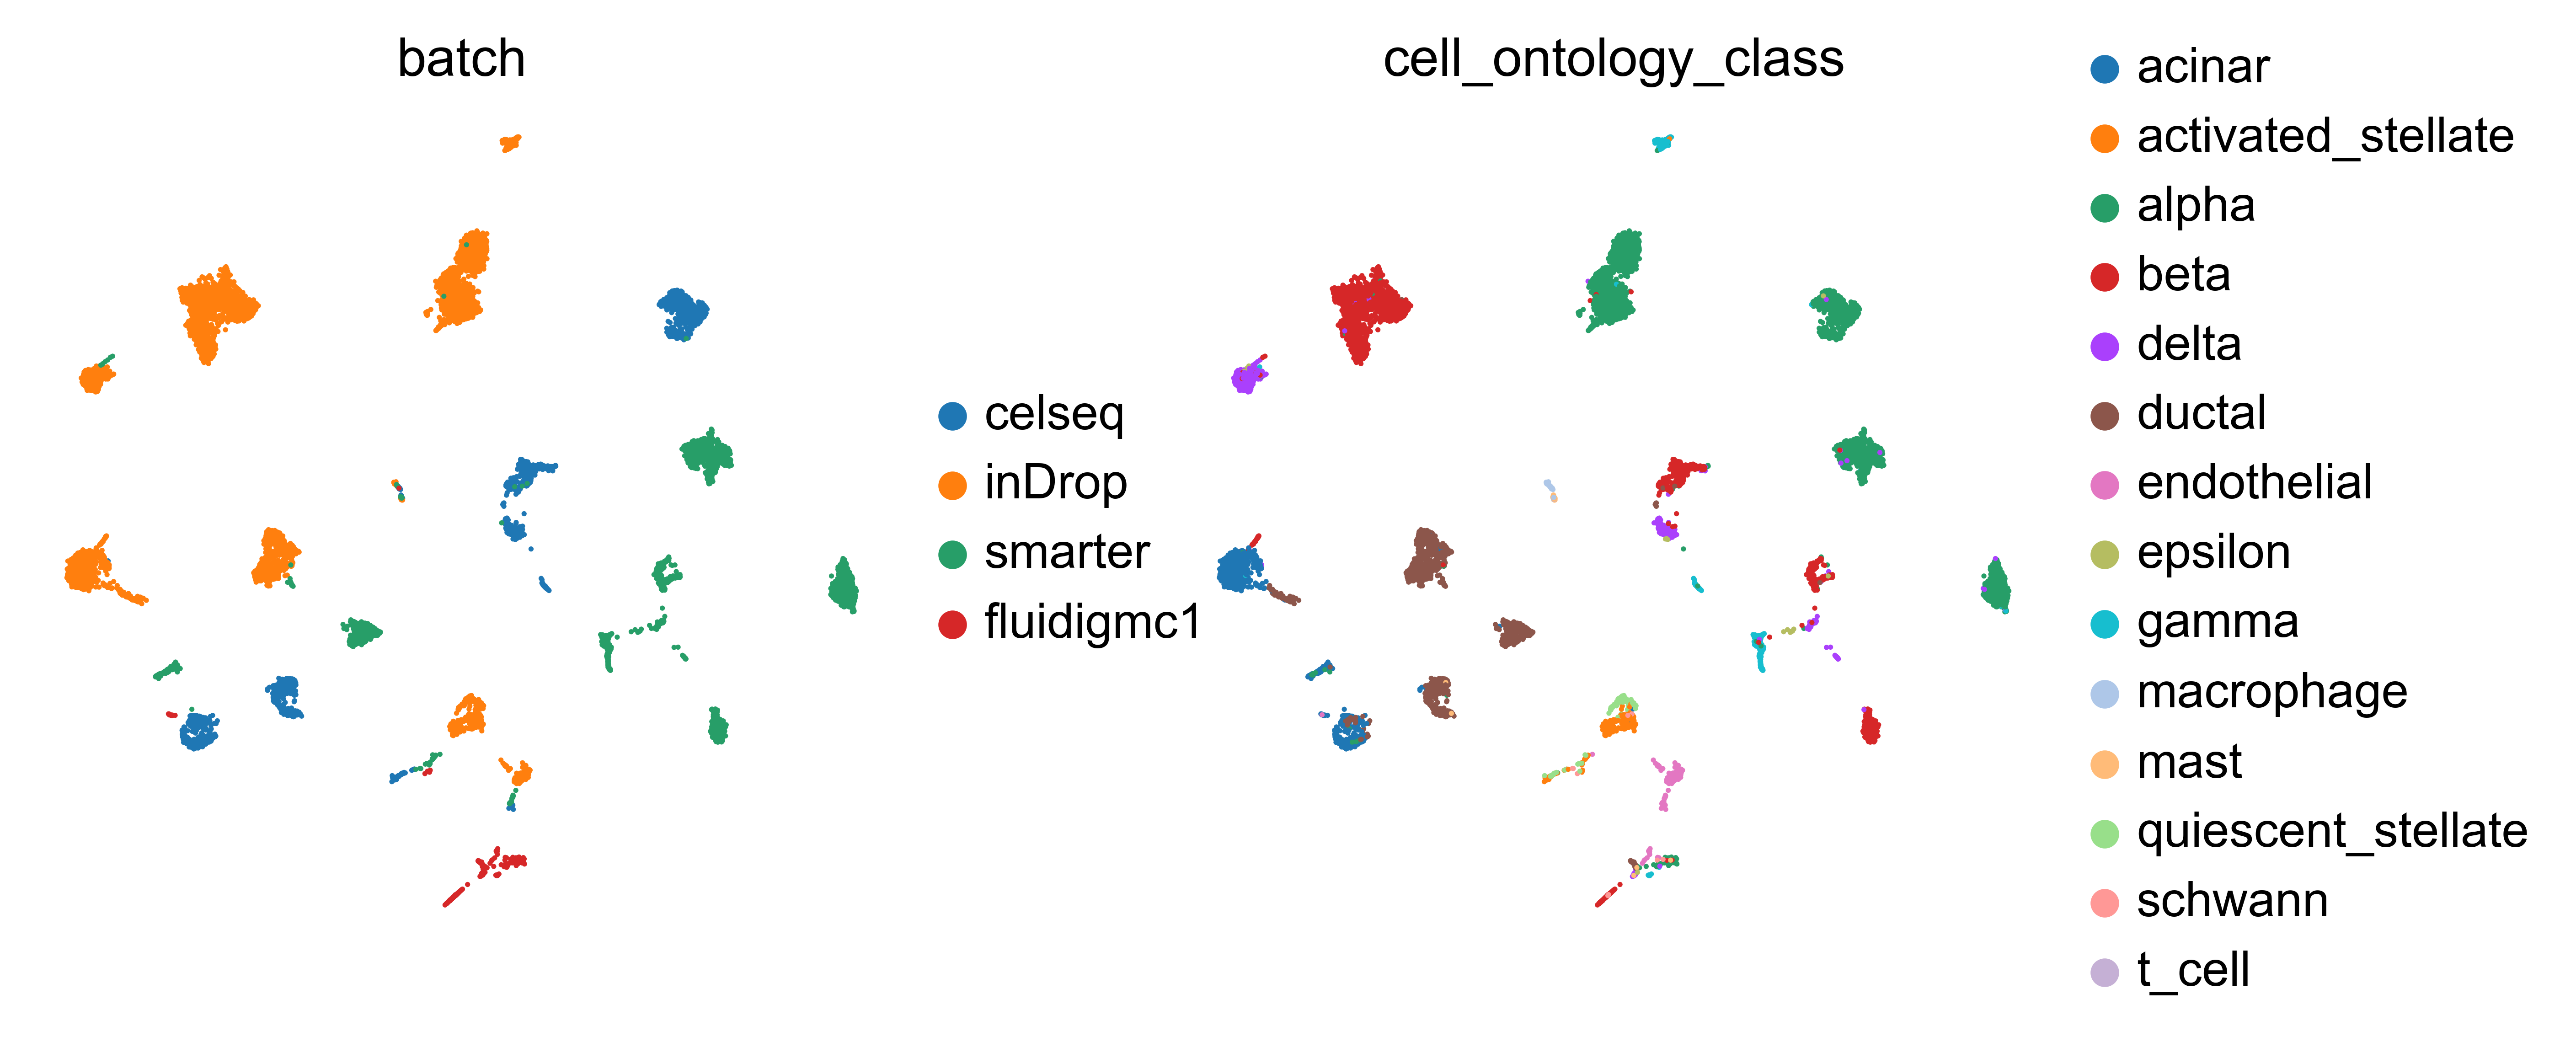

[None, None]

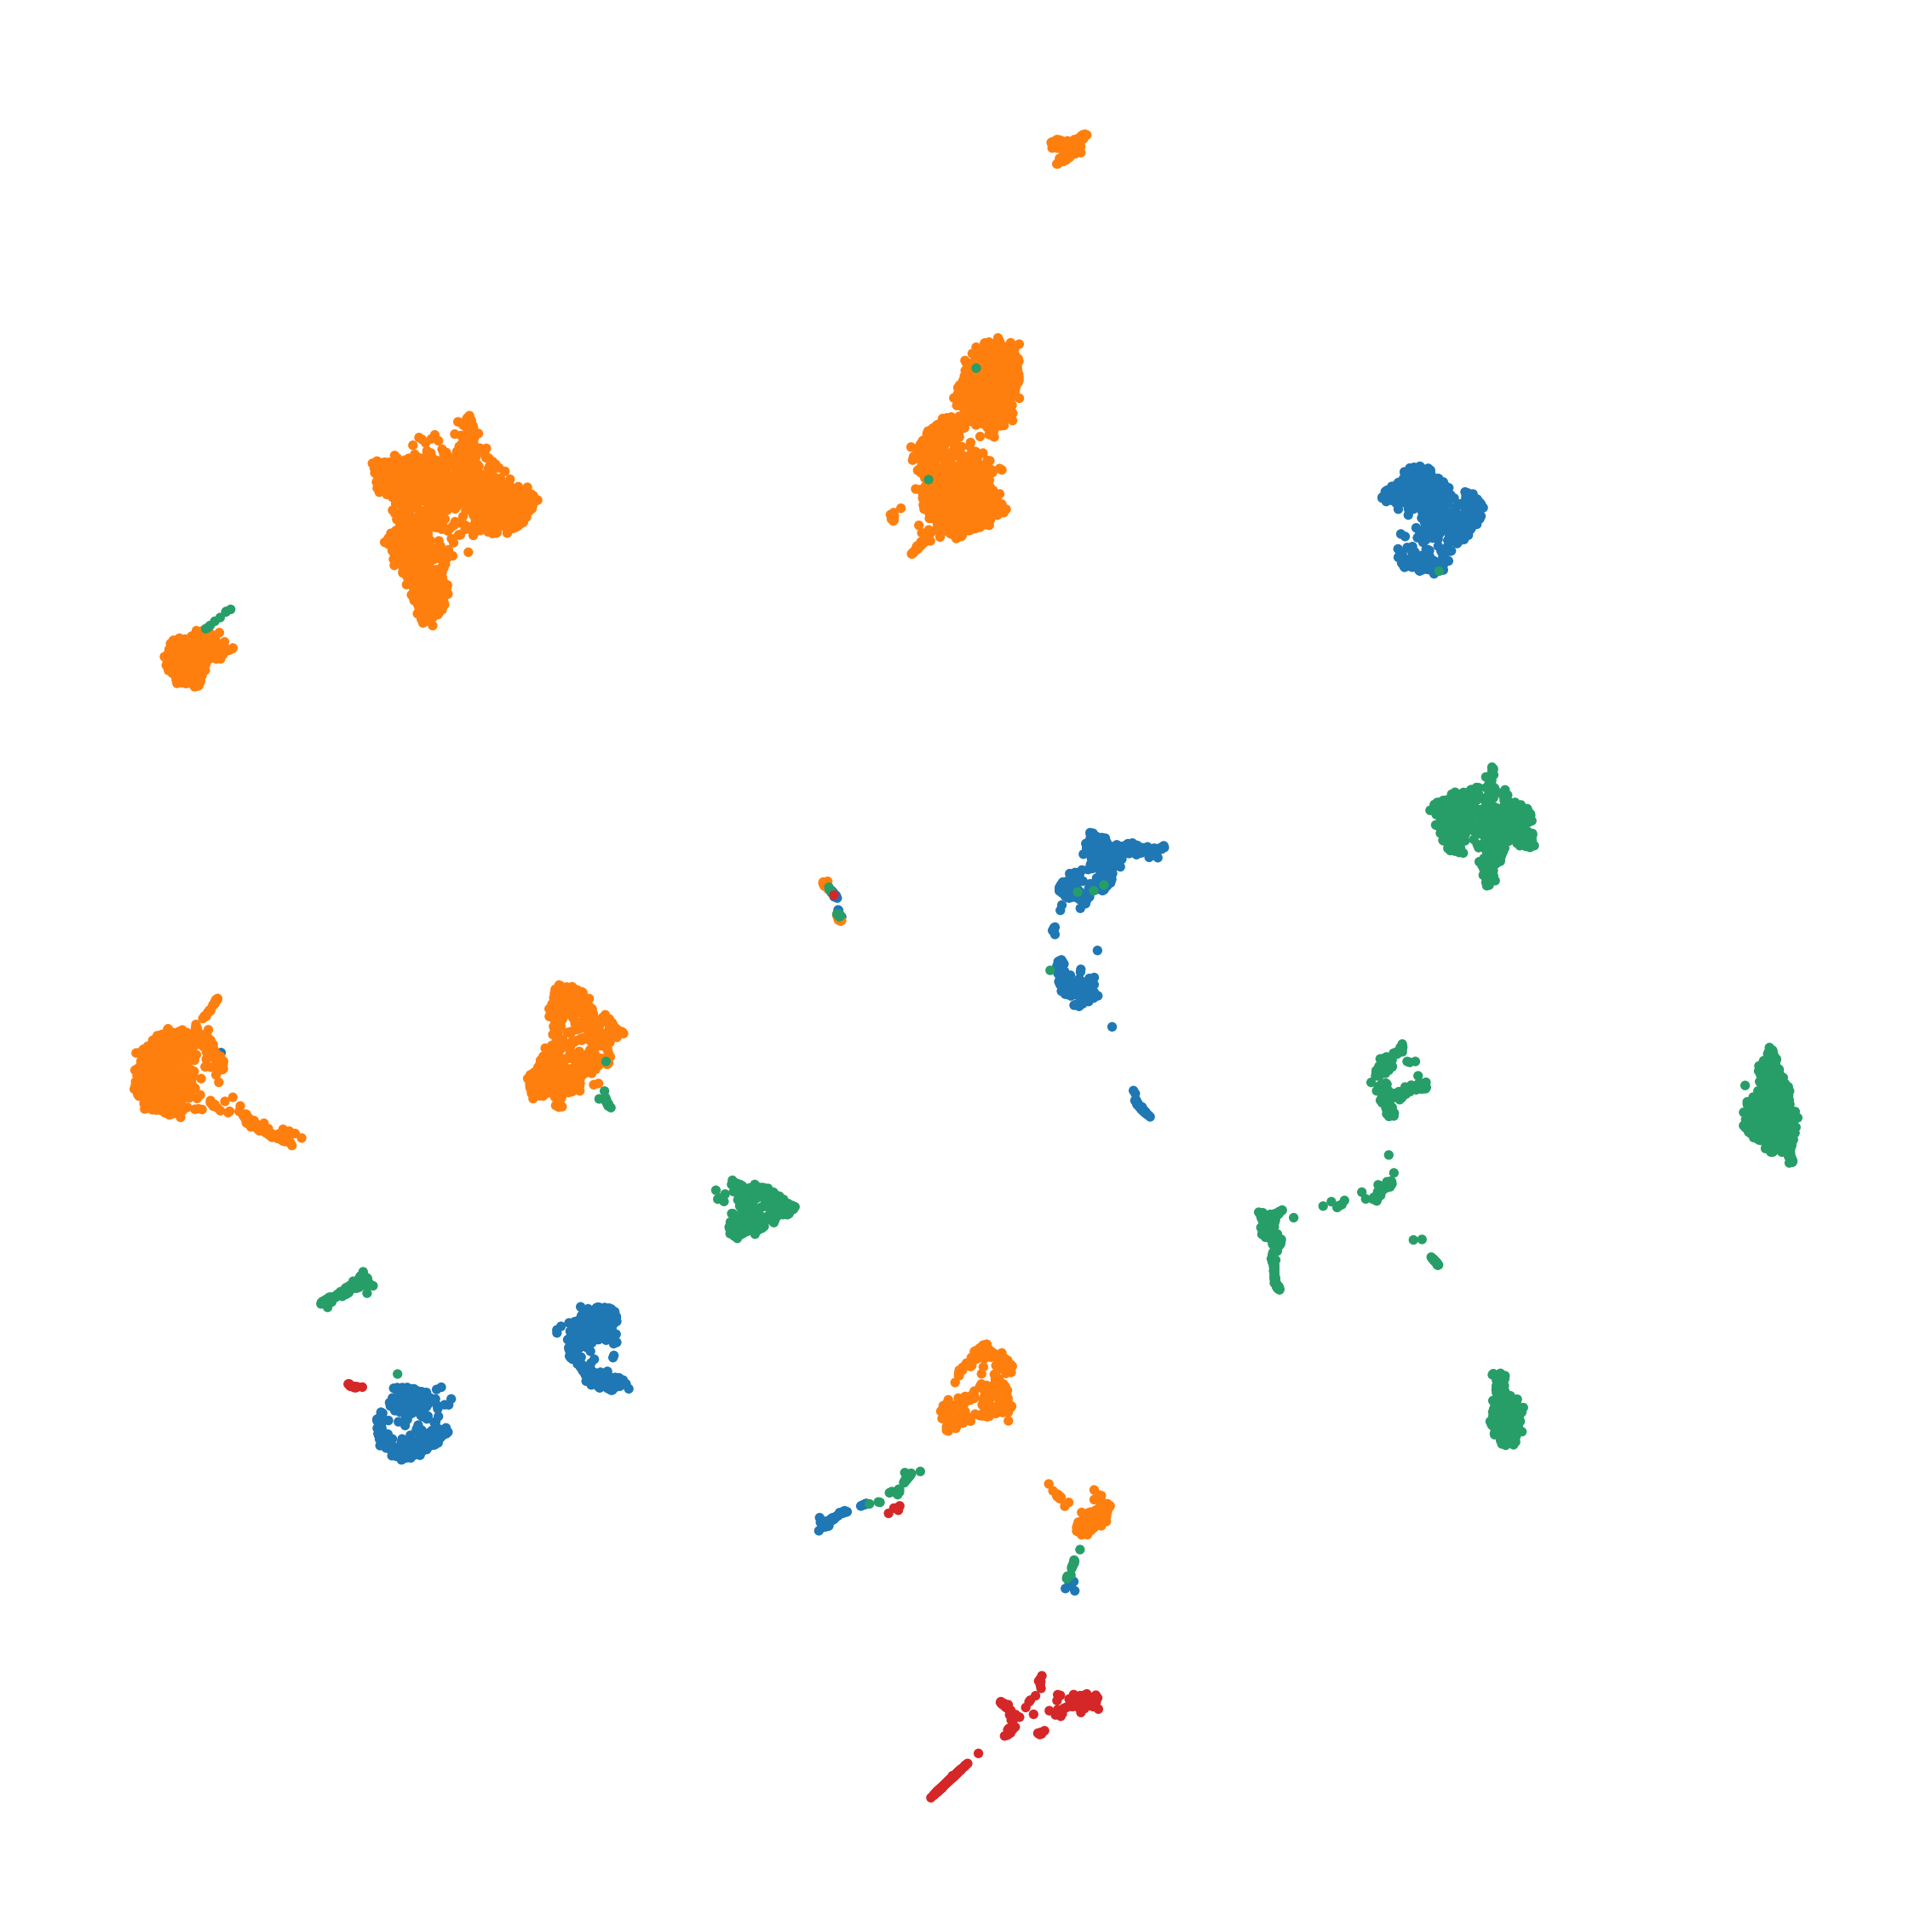

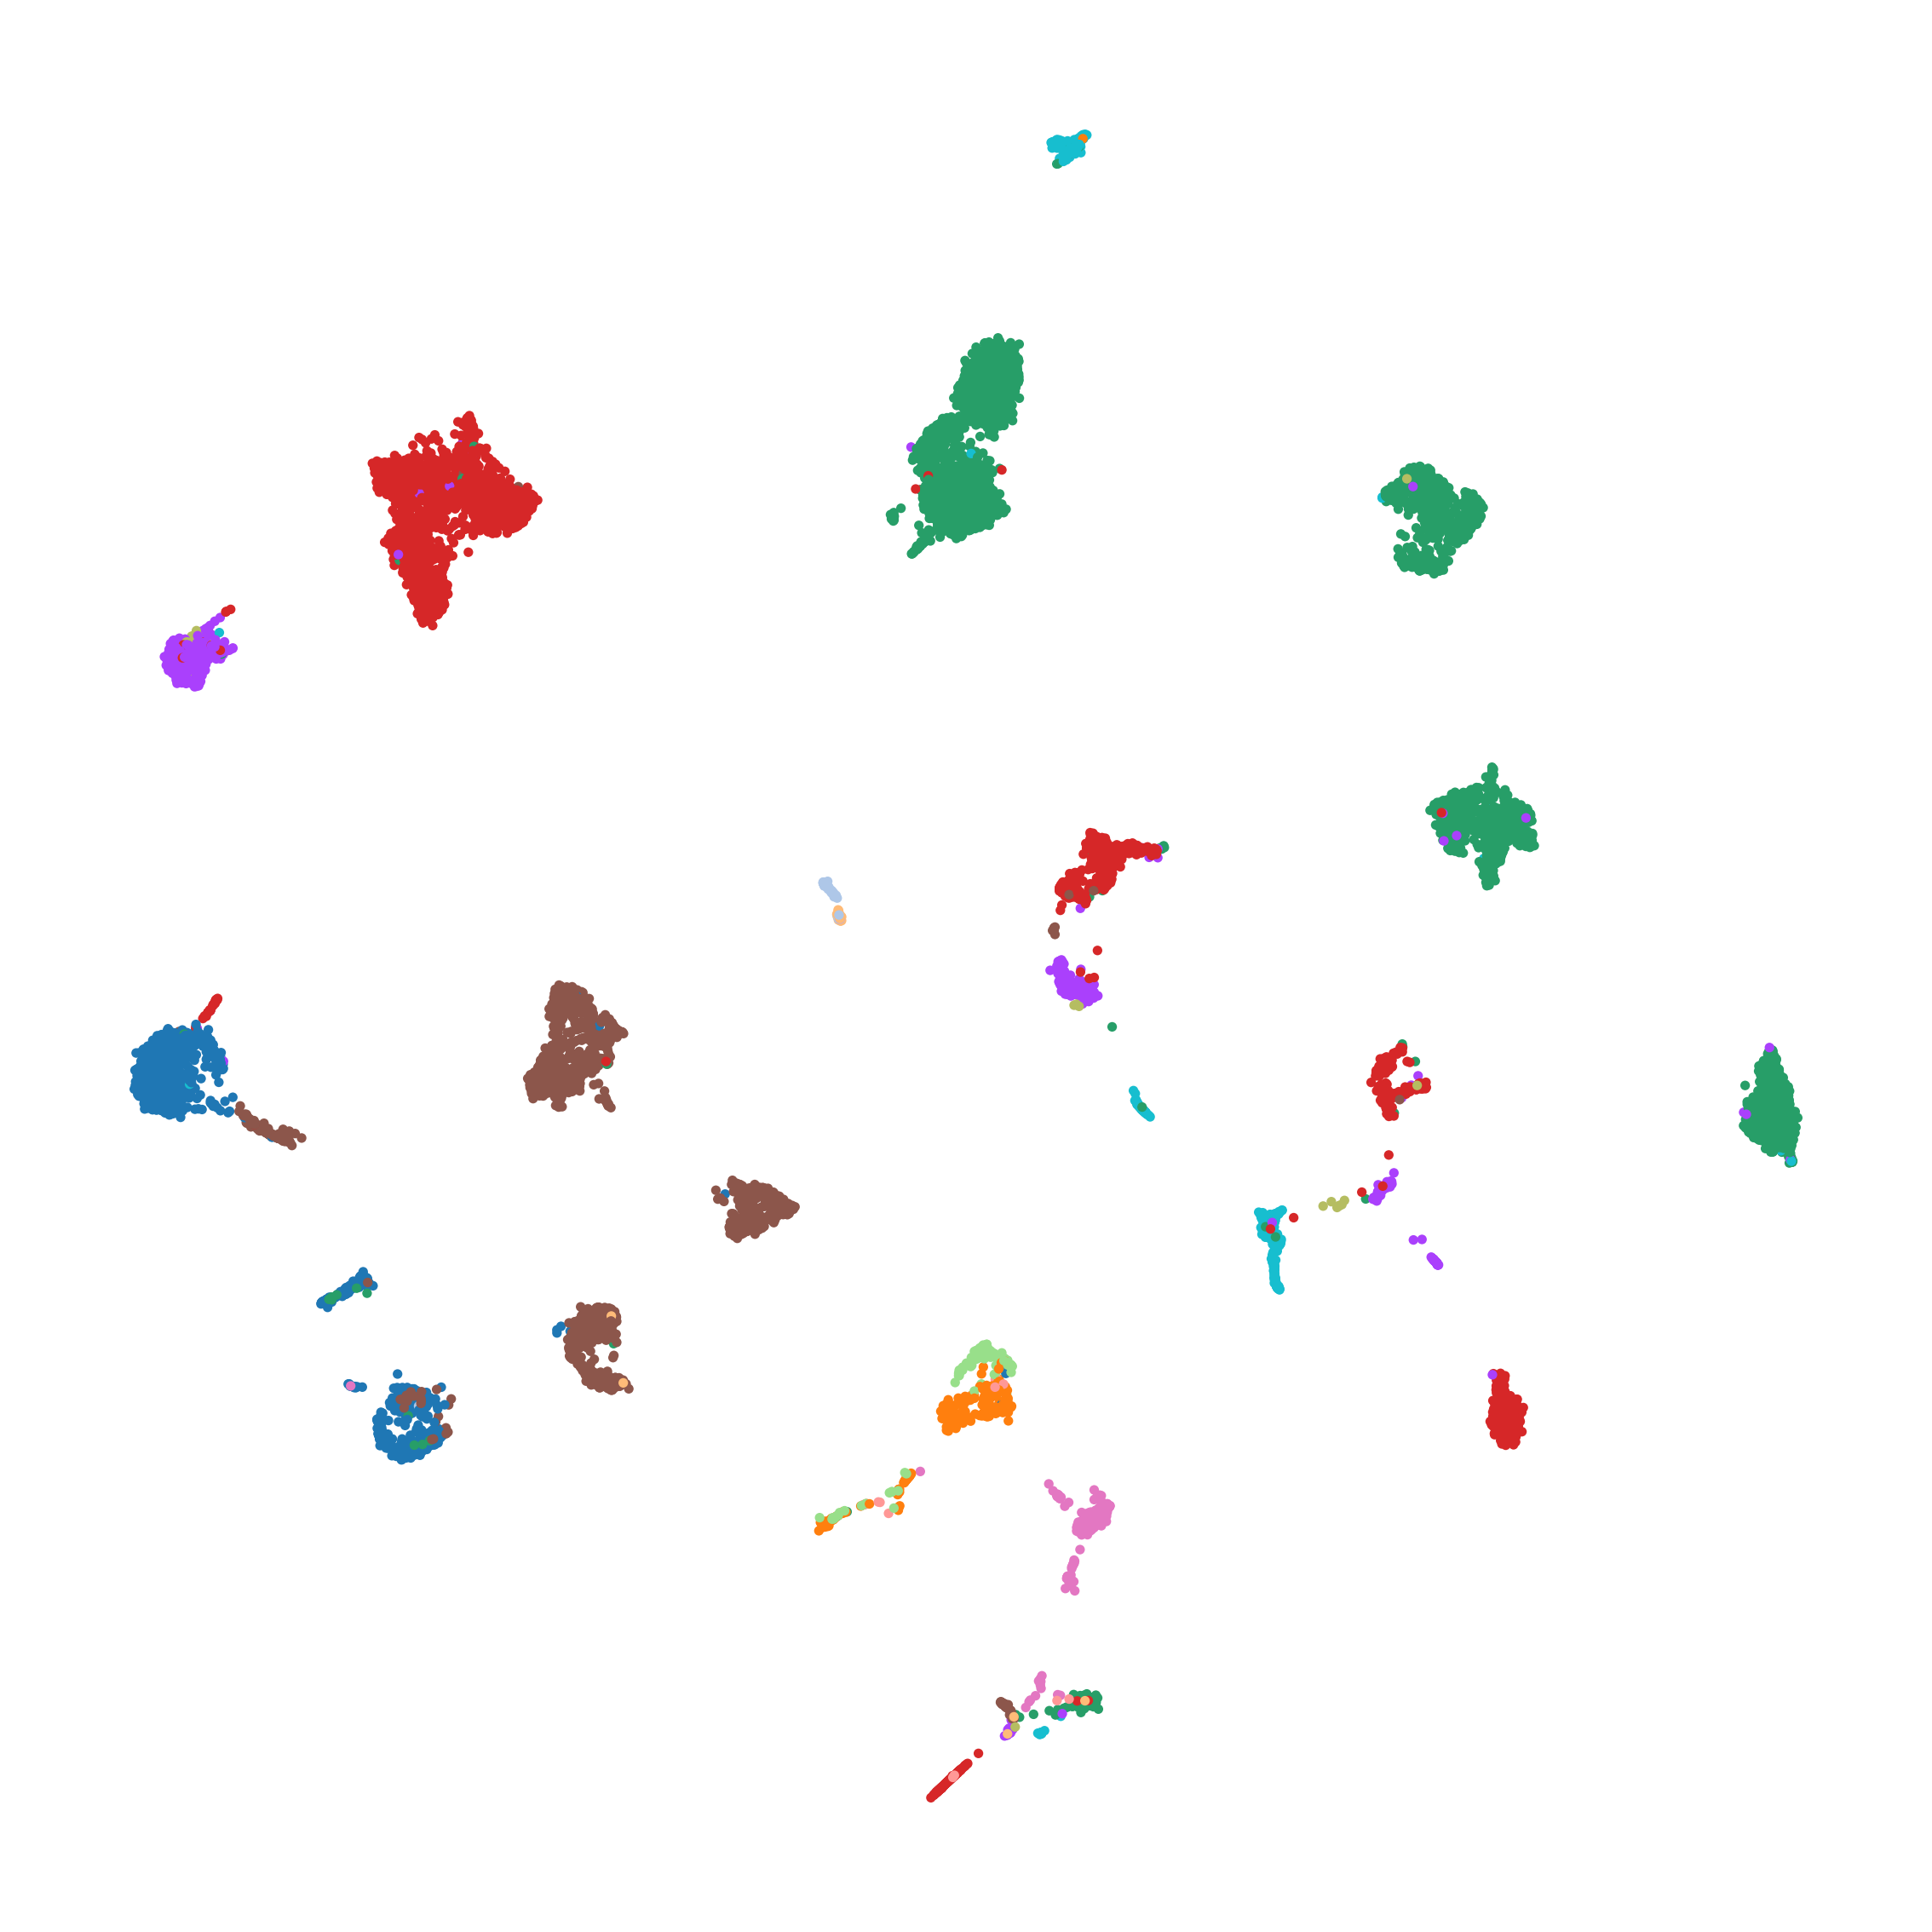

In [46]:
fig = sc.pl.umap(adata_raw, color=['batch', 'cell_ontology_class'])
[clear_fig(sc.pl.umap(adata_raw, color=c, title='', legend_loc=None, return_fig=True)).savefig(f'./{path_results}/raw_{c}.jpg')  for c in ['batch', 'cell_ontology_class']]

In [47]:
raw_bems = metrics.batch_entropy_mixing_score(adata_raw.obsm['X_umap'], adata_raw.obs['batch'])
print(raw_bems)
raw_sc = metrics.silhouette_score(adata_raw.obsm['X_umap'], adata_raw.obs['cell_ontology_class'].cat.codes)
print(raw_sc)

0.012236111304708664
0.056695044


# scanorama

In [42]:
from scCorrect.baseline import scanorama_integrate
adata_scanorama = scanorama_integrate(adata_raw)
sc.pp.neighbors(adata_scanorama, use_rep='X_emb', n_neighbors=30)
sc.tl.umap(adata_scanorama, min_dist=0.1)

Found 2000 genes among all datasets
[[0.         0.24779568 0.60808756 0.09874608]
 [0.         0.         0.3872877  0.04702194]
 [0.         0.         0.         0.8322884 ]
 [0.         0.         0.         0.        ]]
Processing datasets (2, 3)
Processing datasets (0, 2)
Processing datasets (1, 2)
Processing datasets (0, 1)


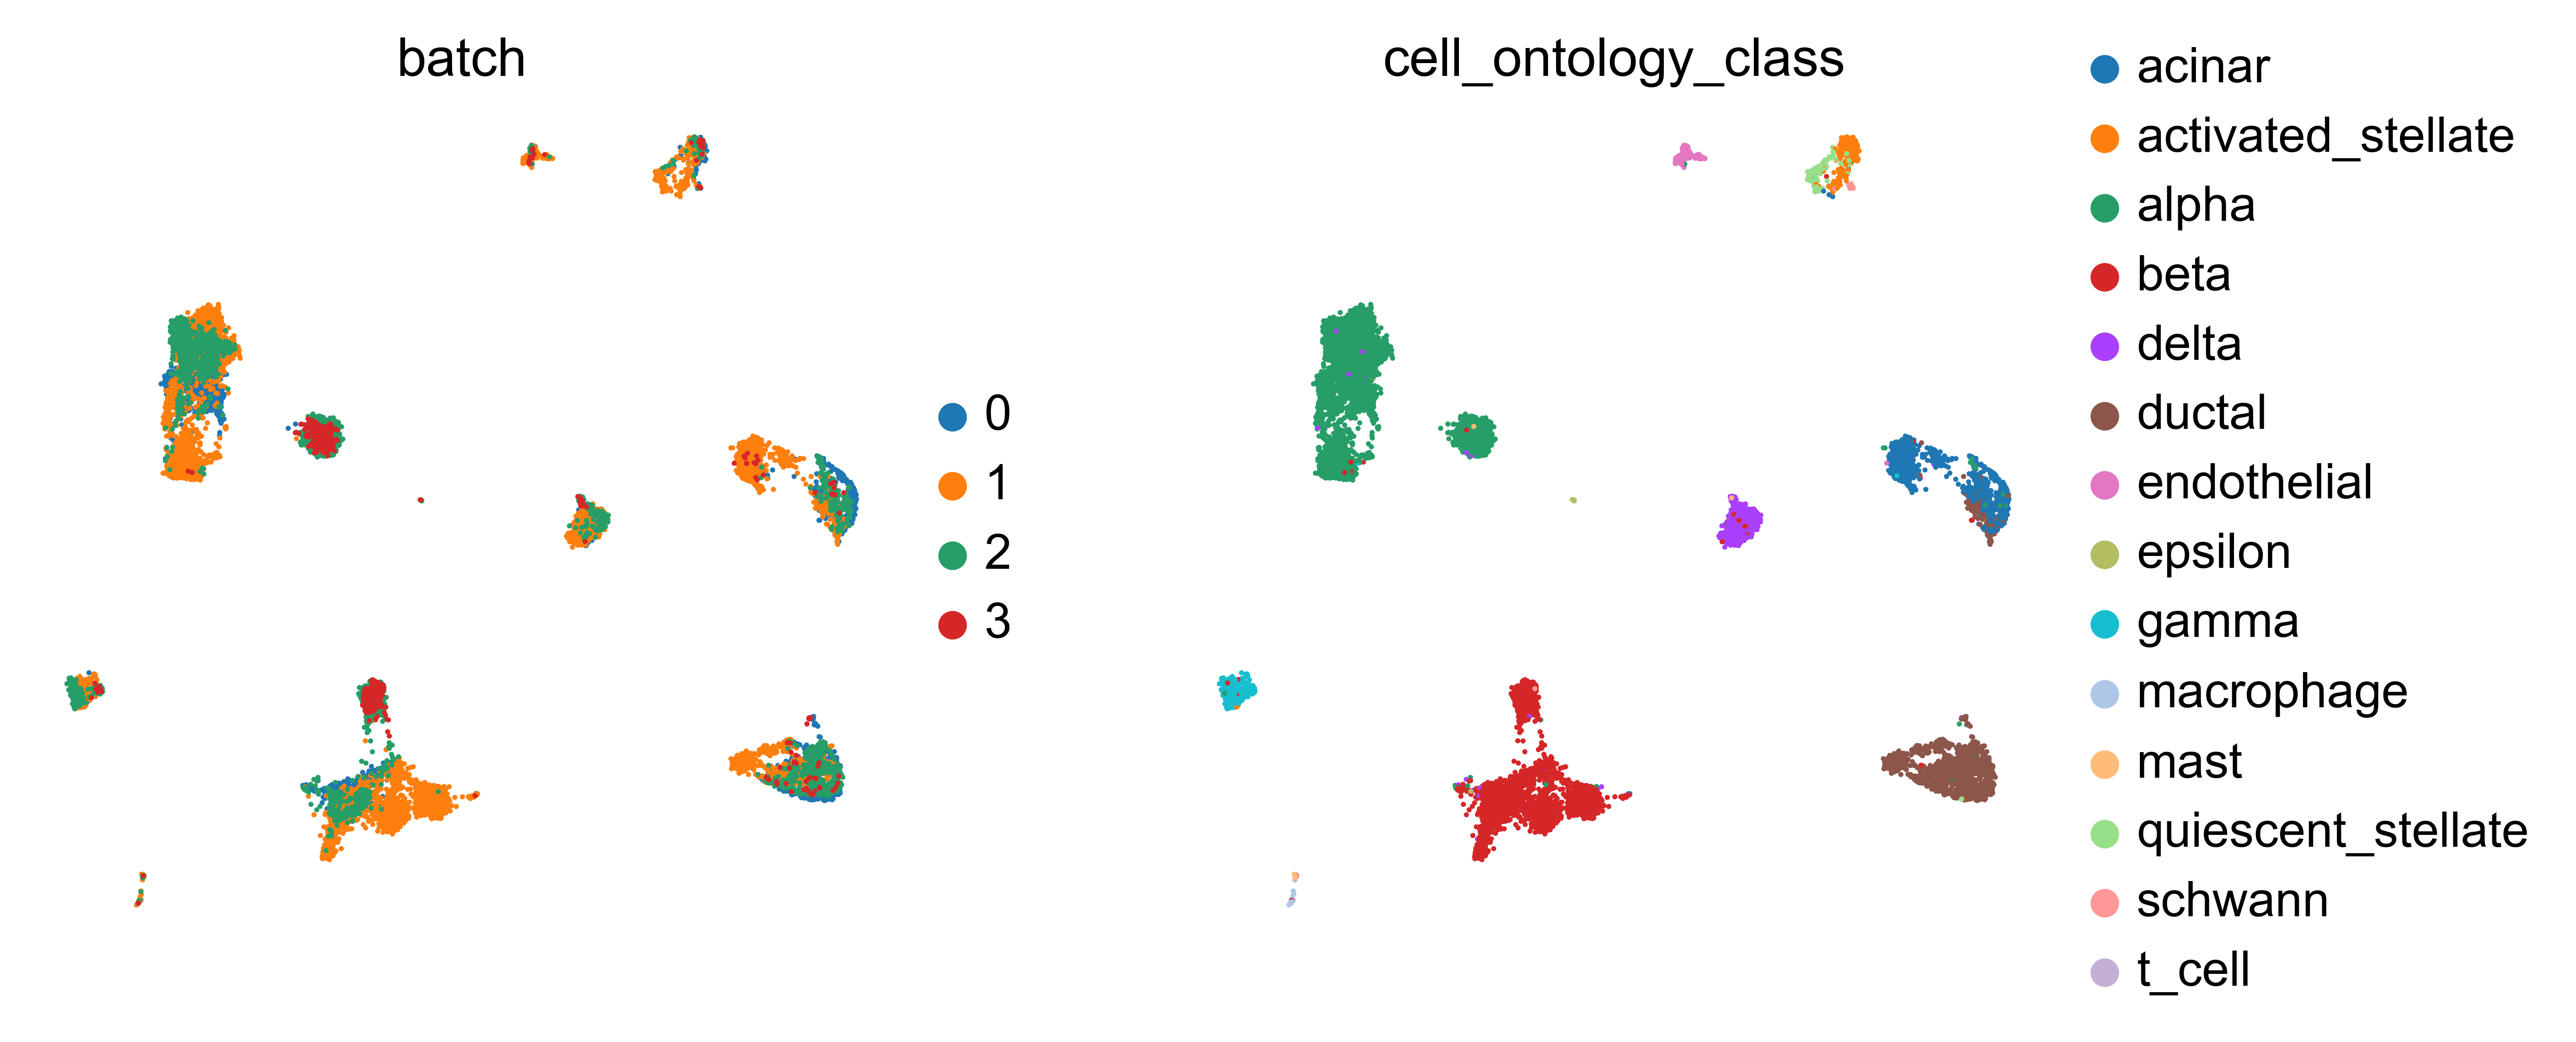

[None, None]

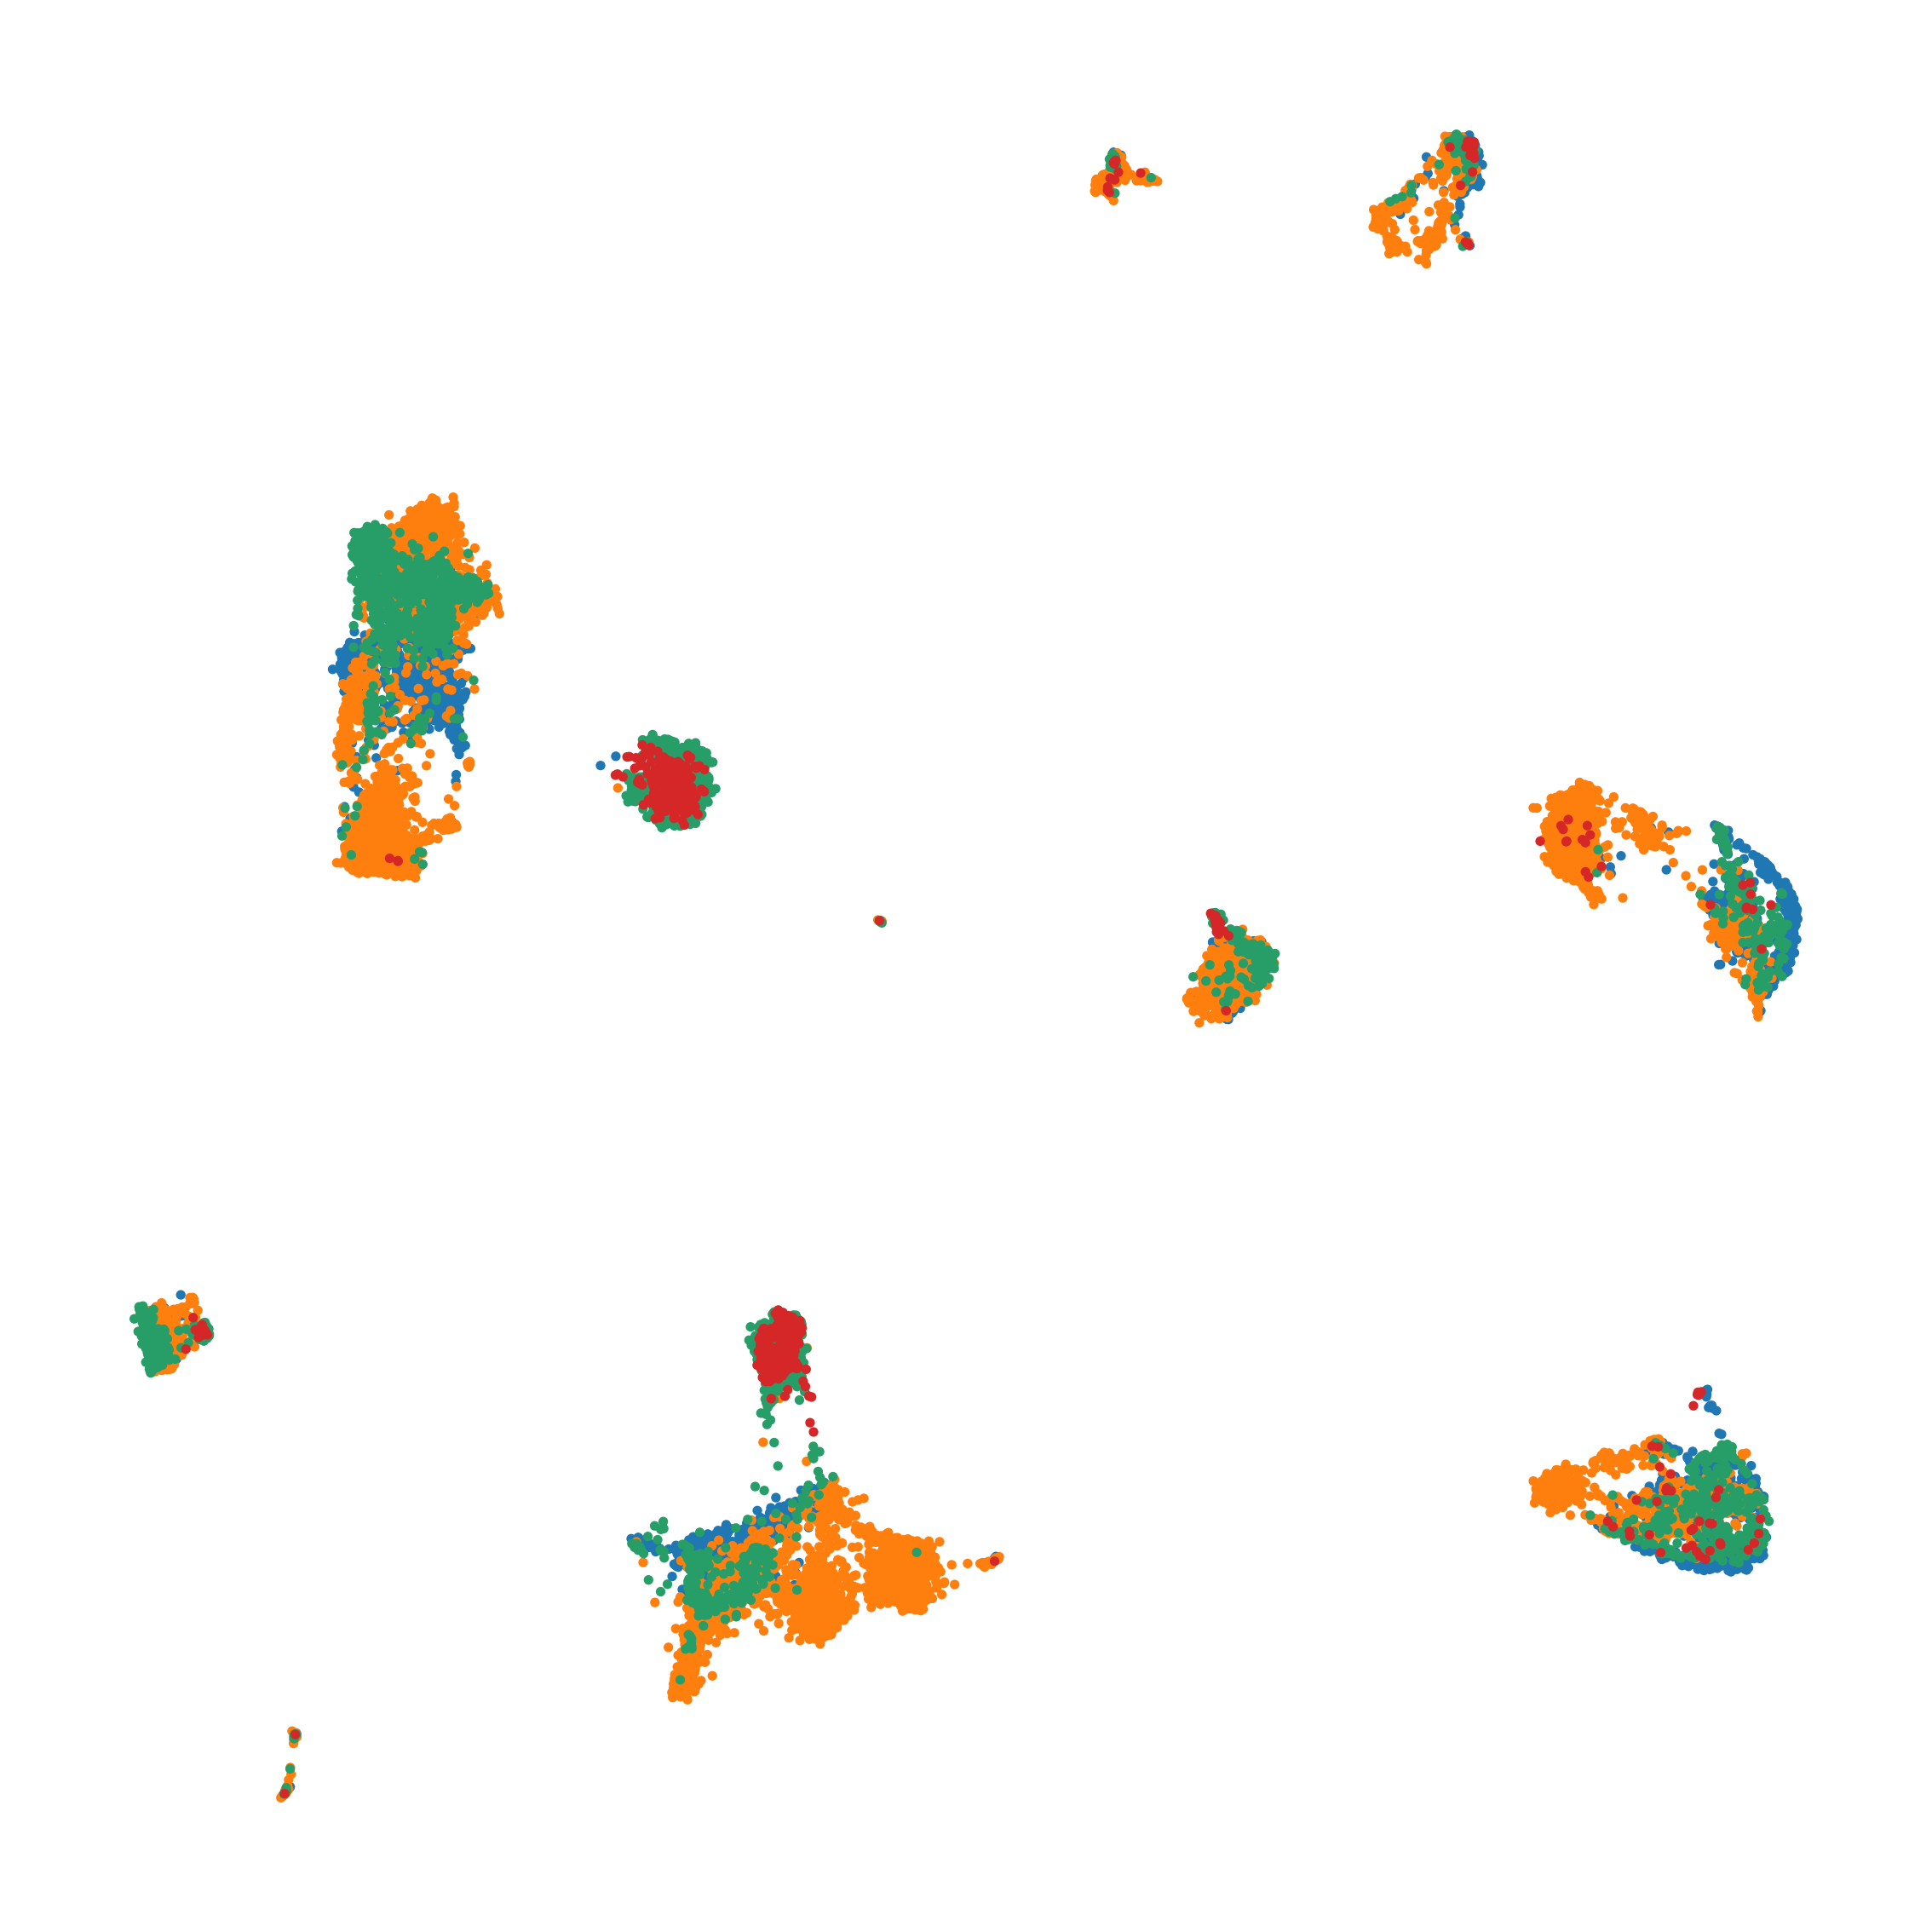

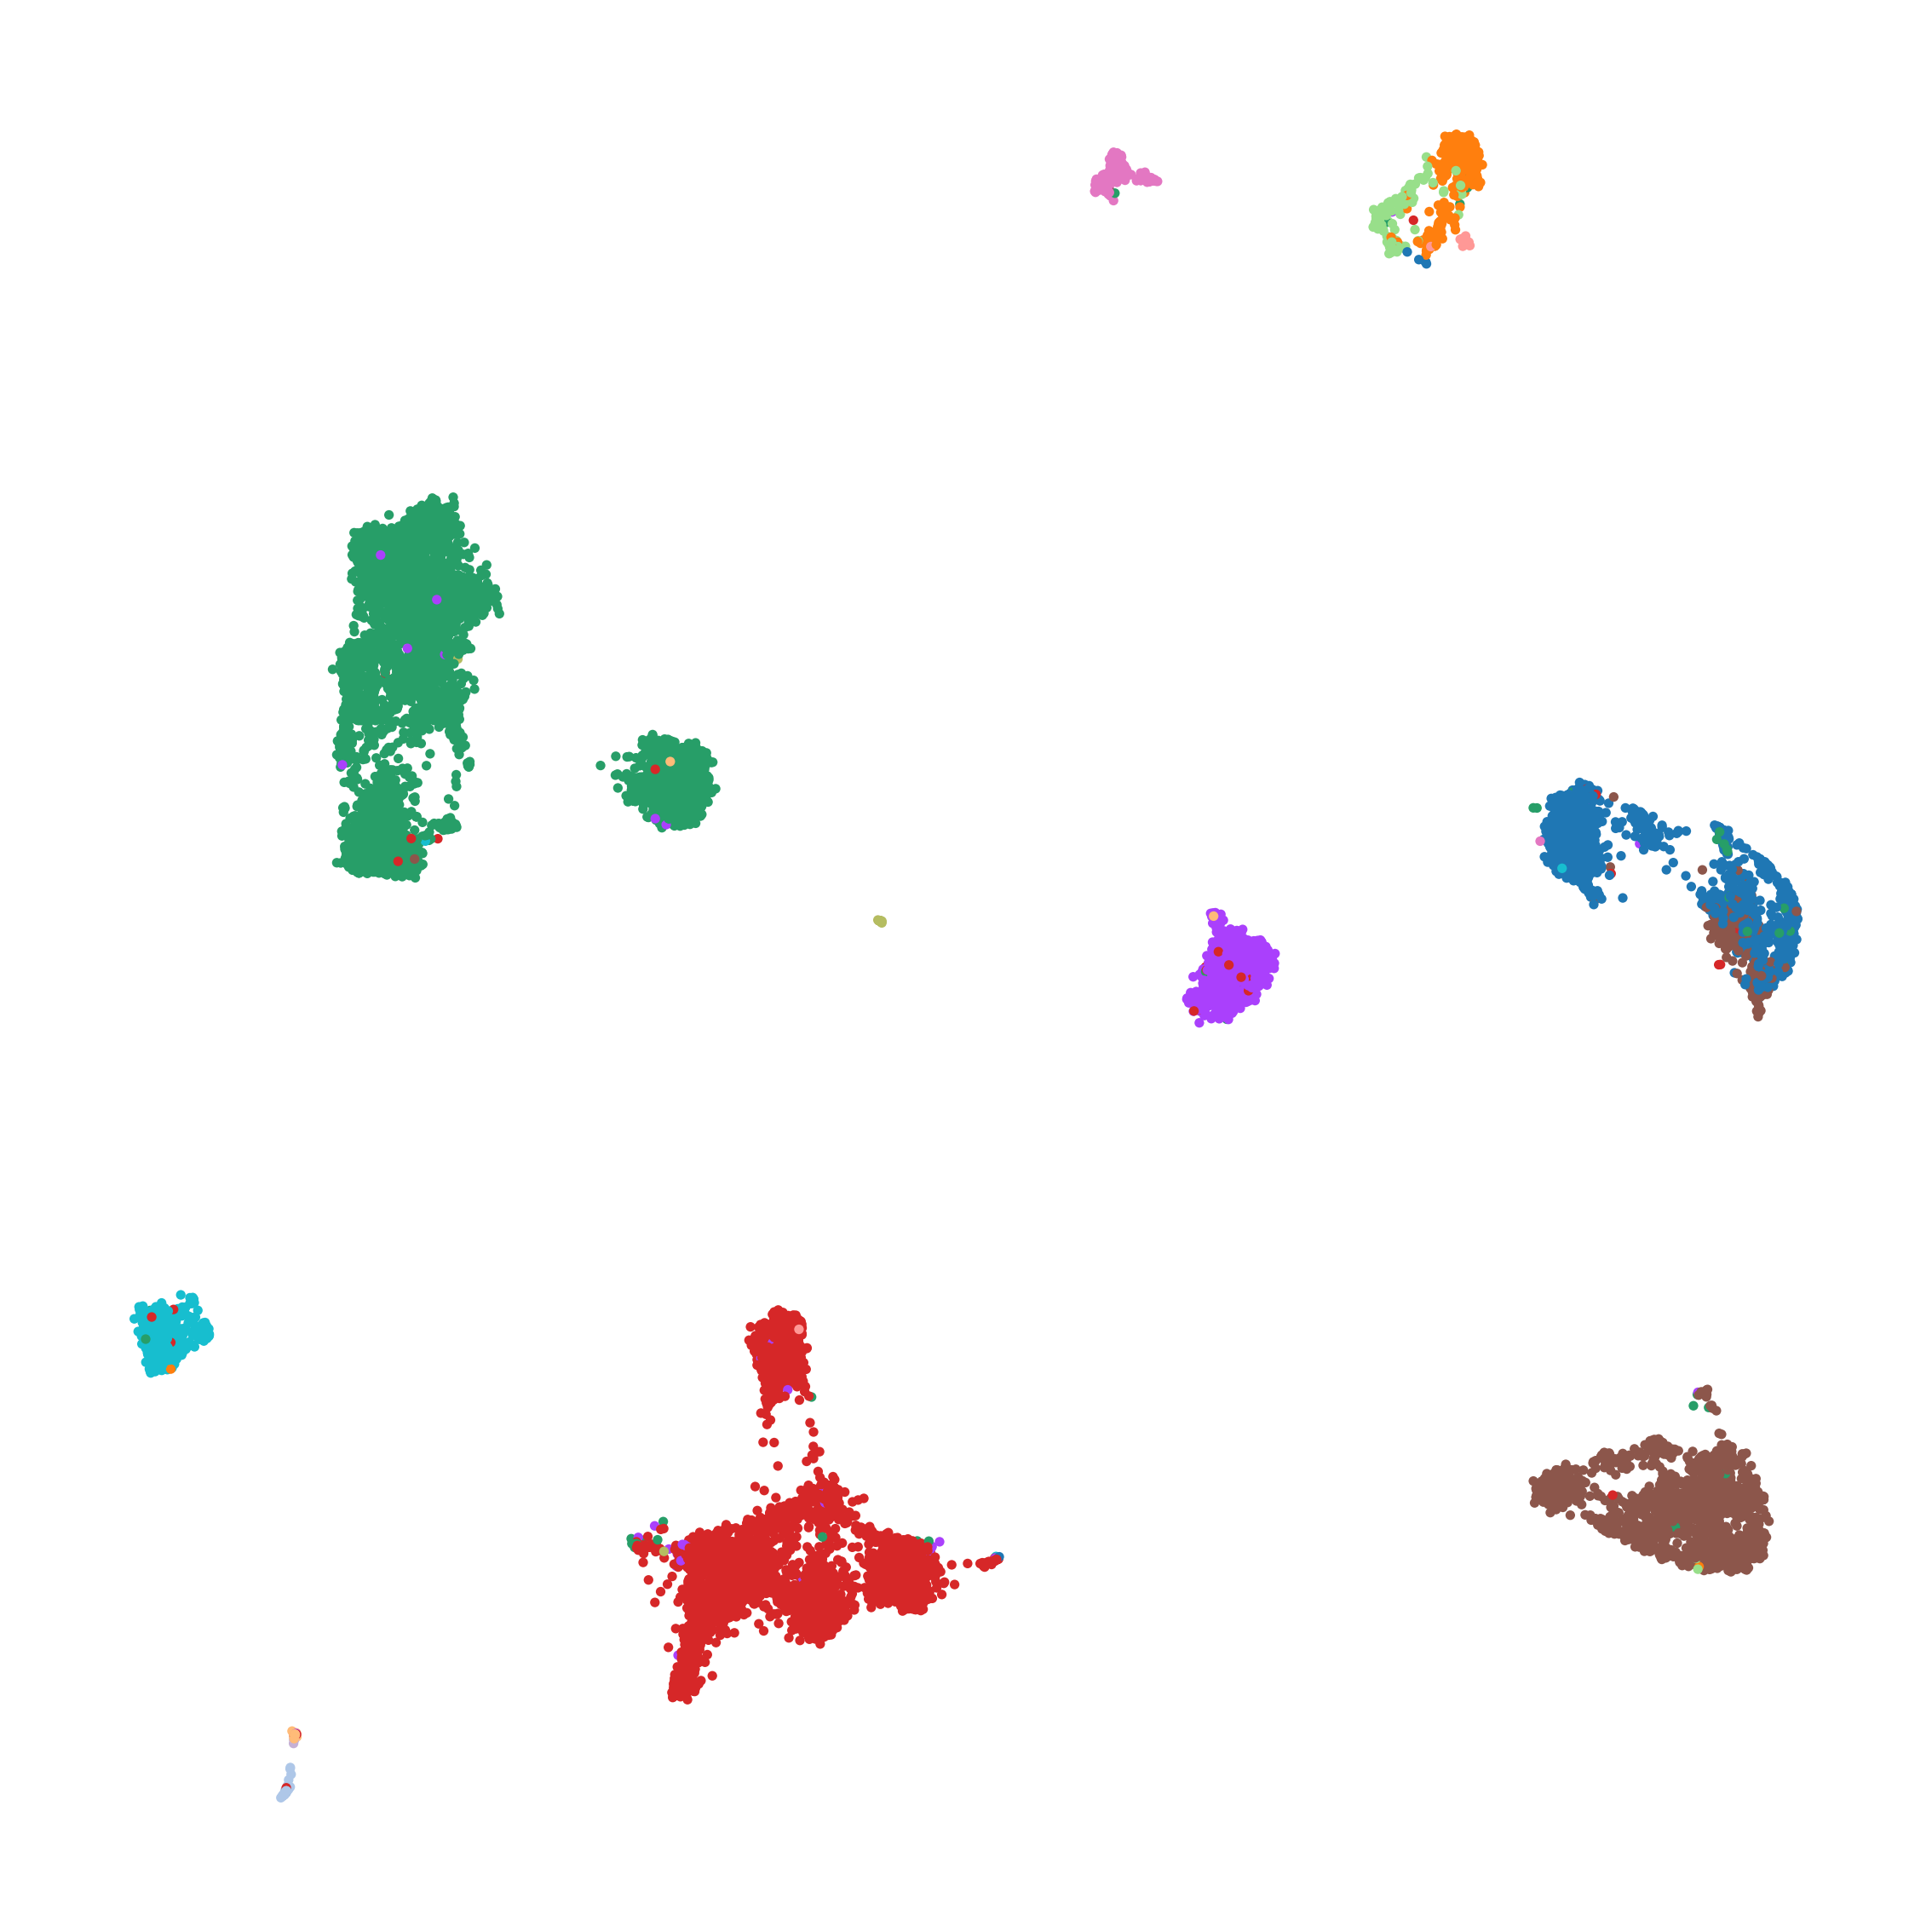

In [43]:
fig = sc.pl.umap(adata_scanorama, color=['batch', 'cell_ontology_class'])
[clear_fig(sc.pl.umap(adata_scanorama, color=c, title='', legend_loc=None, return_fig=True)).savefig(f'./{path_results}/scanorama_{c}.jpg')  for c in ['batch', 'cell_ontology_class']]

In [44]:
scanorama_bems = metrics.batch_entropy_mixing_score(adata_scanorama.obsm['X_umap'], adata_scanorama.obs['batch'])
print(scanorama_bems)
scanorama_sc = metrics.silhouette_score(adata_scanorama.obsm['X_umap'], adata_scanorama.obs['cell_ontology_class'].cat.codes)
print(scanorama_sc)

0.29253241604017377
0.6250725


In [50]:
scanorama_metrics = metrics.evaluate_all(adata_raw, adata_scanorama, 'scanorama', batch_key='batch', label_key='cell_ontology_class', cluster_nmi=None, verbose=False)
print(scanorama_metrics)

C:\Users\10360\anaconda3\envs\py39\lib\site-packages\scib\metrics\metrics.py:293: DeprecationWarning: Call to deprecated function (or staticmethod) opt_louvain.
  res_max, nmi_max, nmi_all = opt_louvain(


NMI...
ARI...
Silhouette score...
PC regression...
Isolated labels F1...
Compute neighbors on rep X_emb
Isolated labels ASW...
Graph connectivity...
                                  0
NMI_cluster/label          0.909401
ARI_cluster/label          0.945791
ASW_label                  0.590001
ASW_label/batch            0.907712
PCR_batch                  0.591109
cell_cycle_conservation         NaN
isolated_label_F1          0.102190
isolated_label_silhouette  0.570515
graph_conn                 0.986878
kBET                            NaN
iLISI                           NaN
cLISI                           NaN
hvg_overlap                     NaN
trajectory                      NaN


In [52]:
scanorama_metrics.to_csv(f'{path_results}/metrics_scanorama.csv', index=True, header=True)

# bbknn

In [54]:
from scCorrect.baseline import bbknn_integrate
adata_bbknn = bbknn_integrate(adata_raw)
# sc.pp.neighbors(adata_bbknn, use_rep='X_emb', n_neighbors=30)
sc.tl.umap(adata_bbknn, min_dist=0.1)

[None, None]

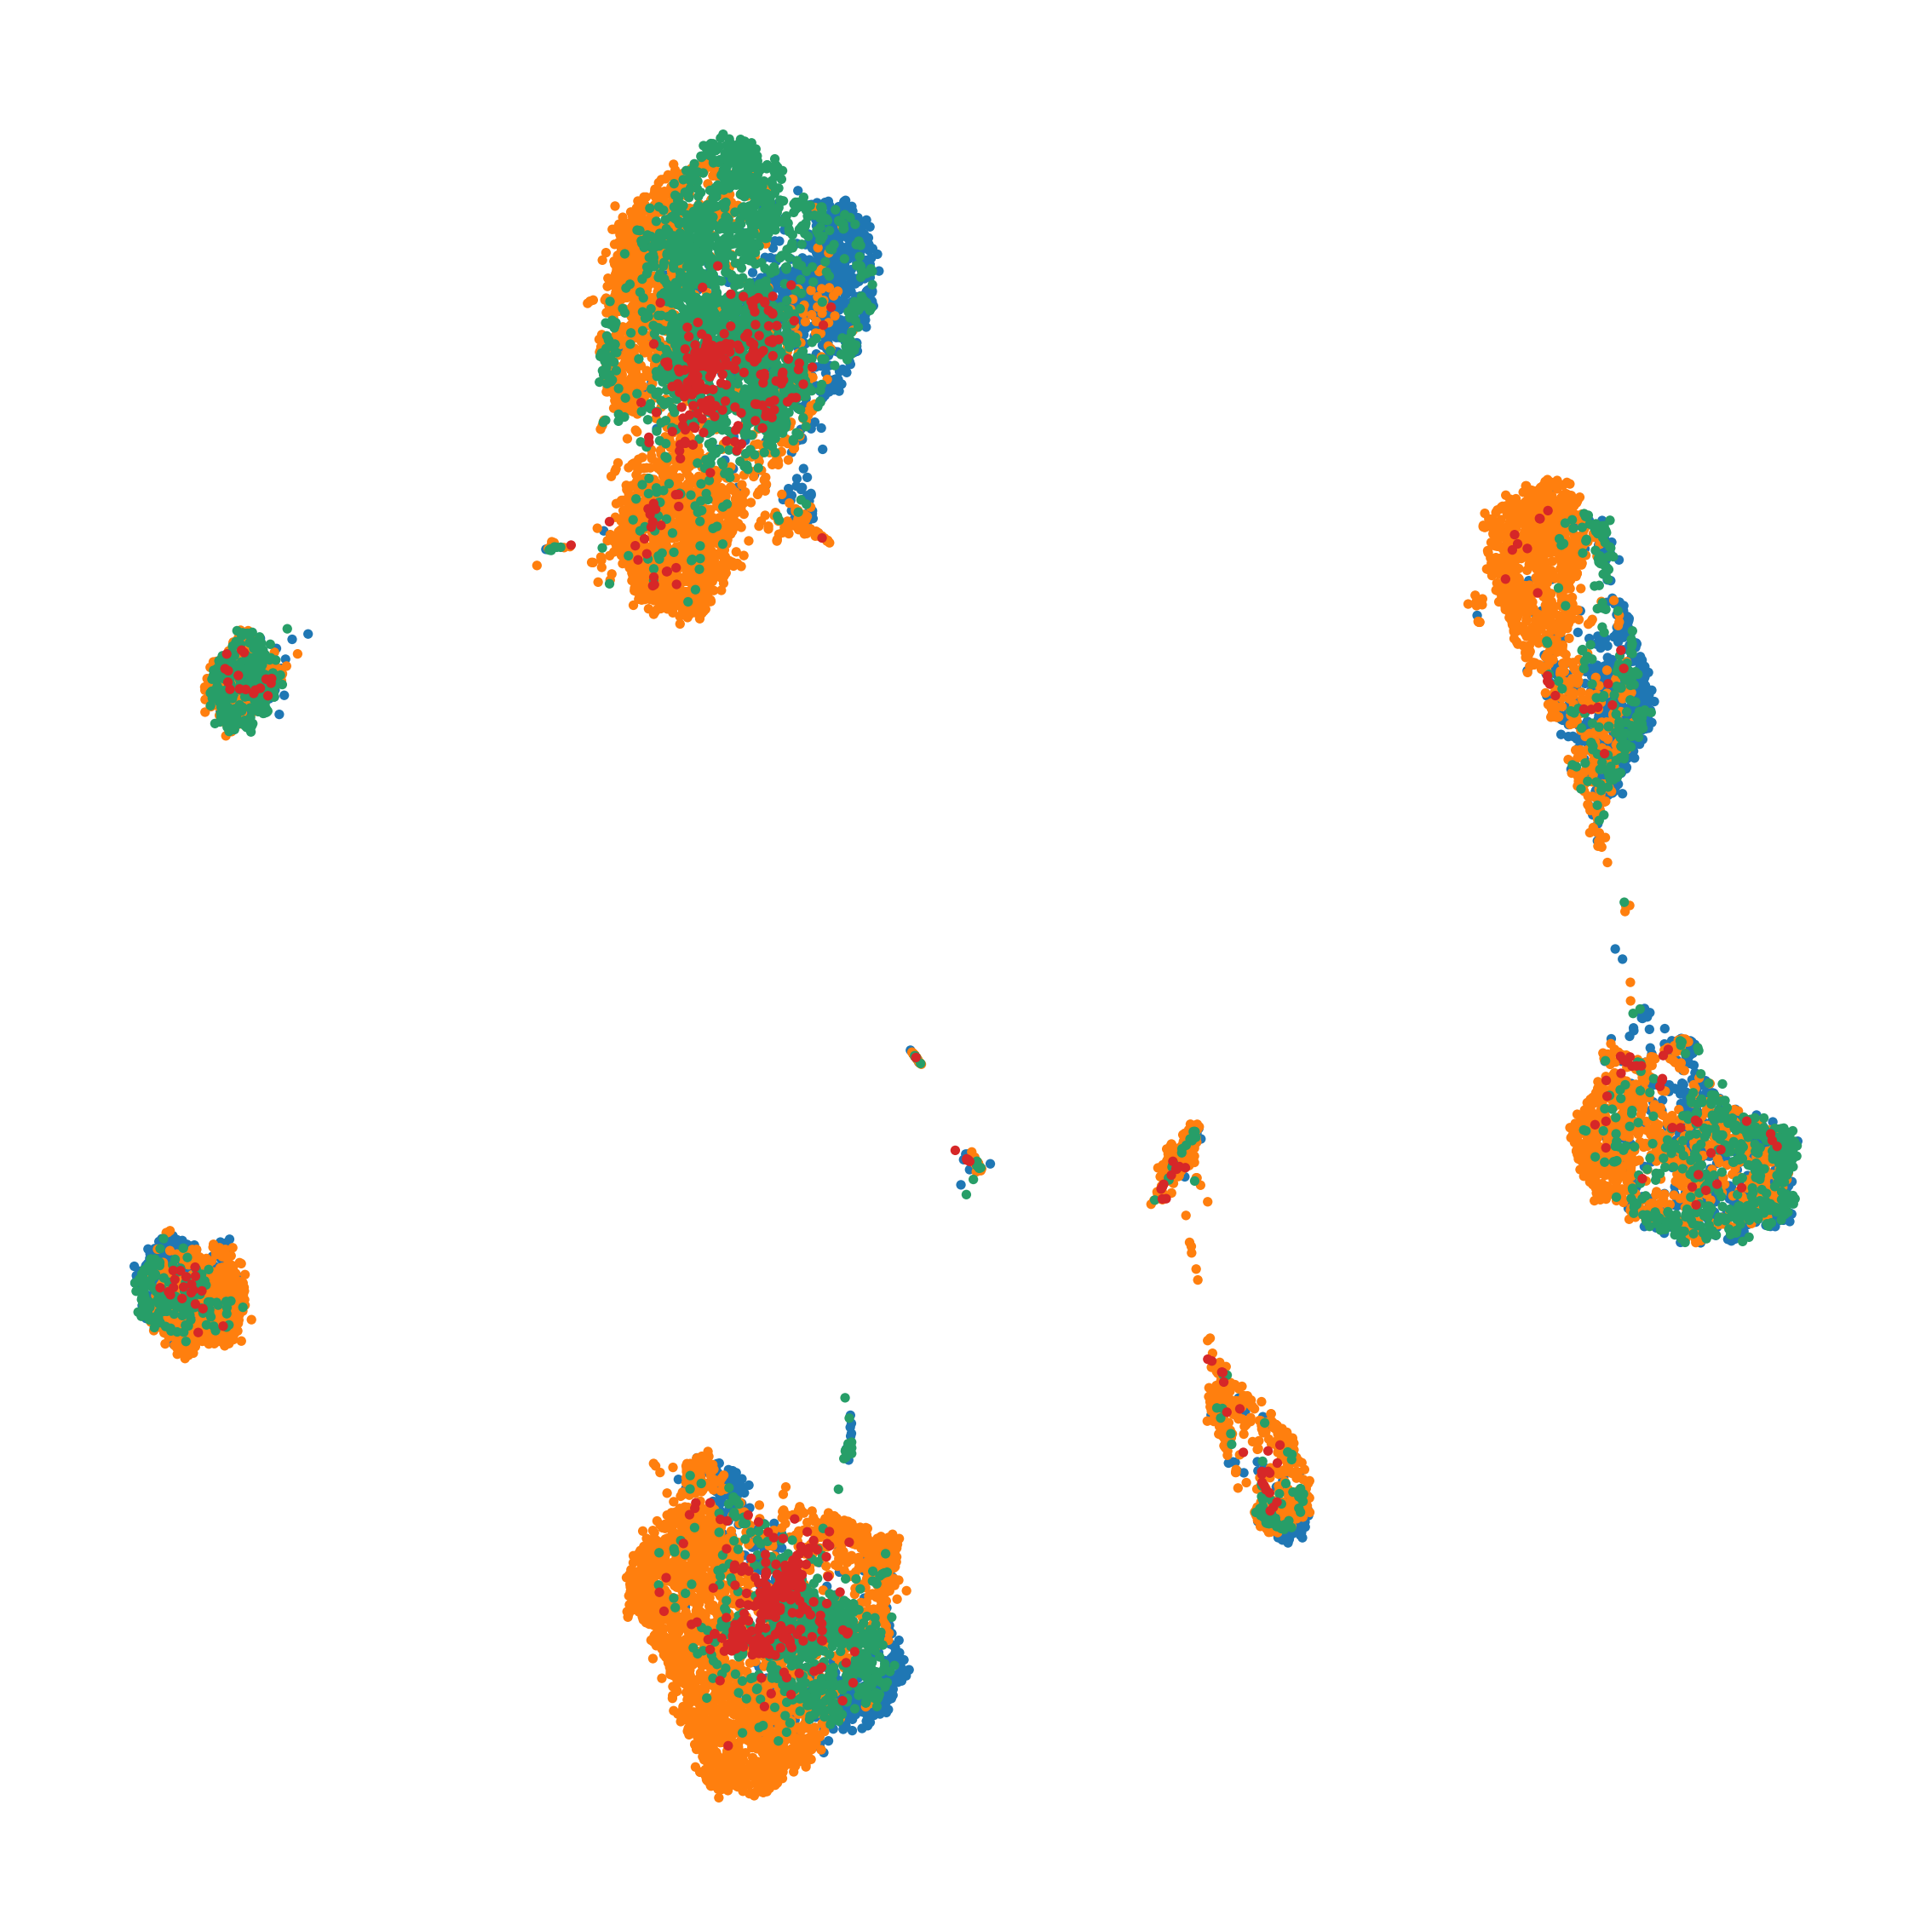

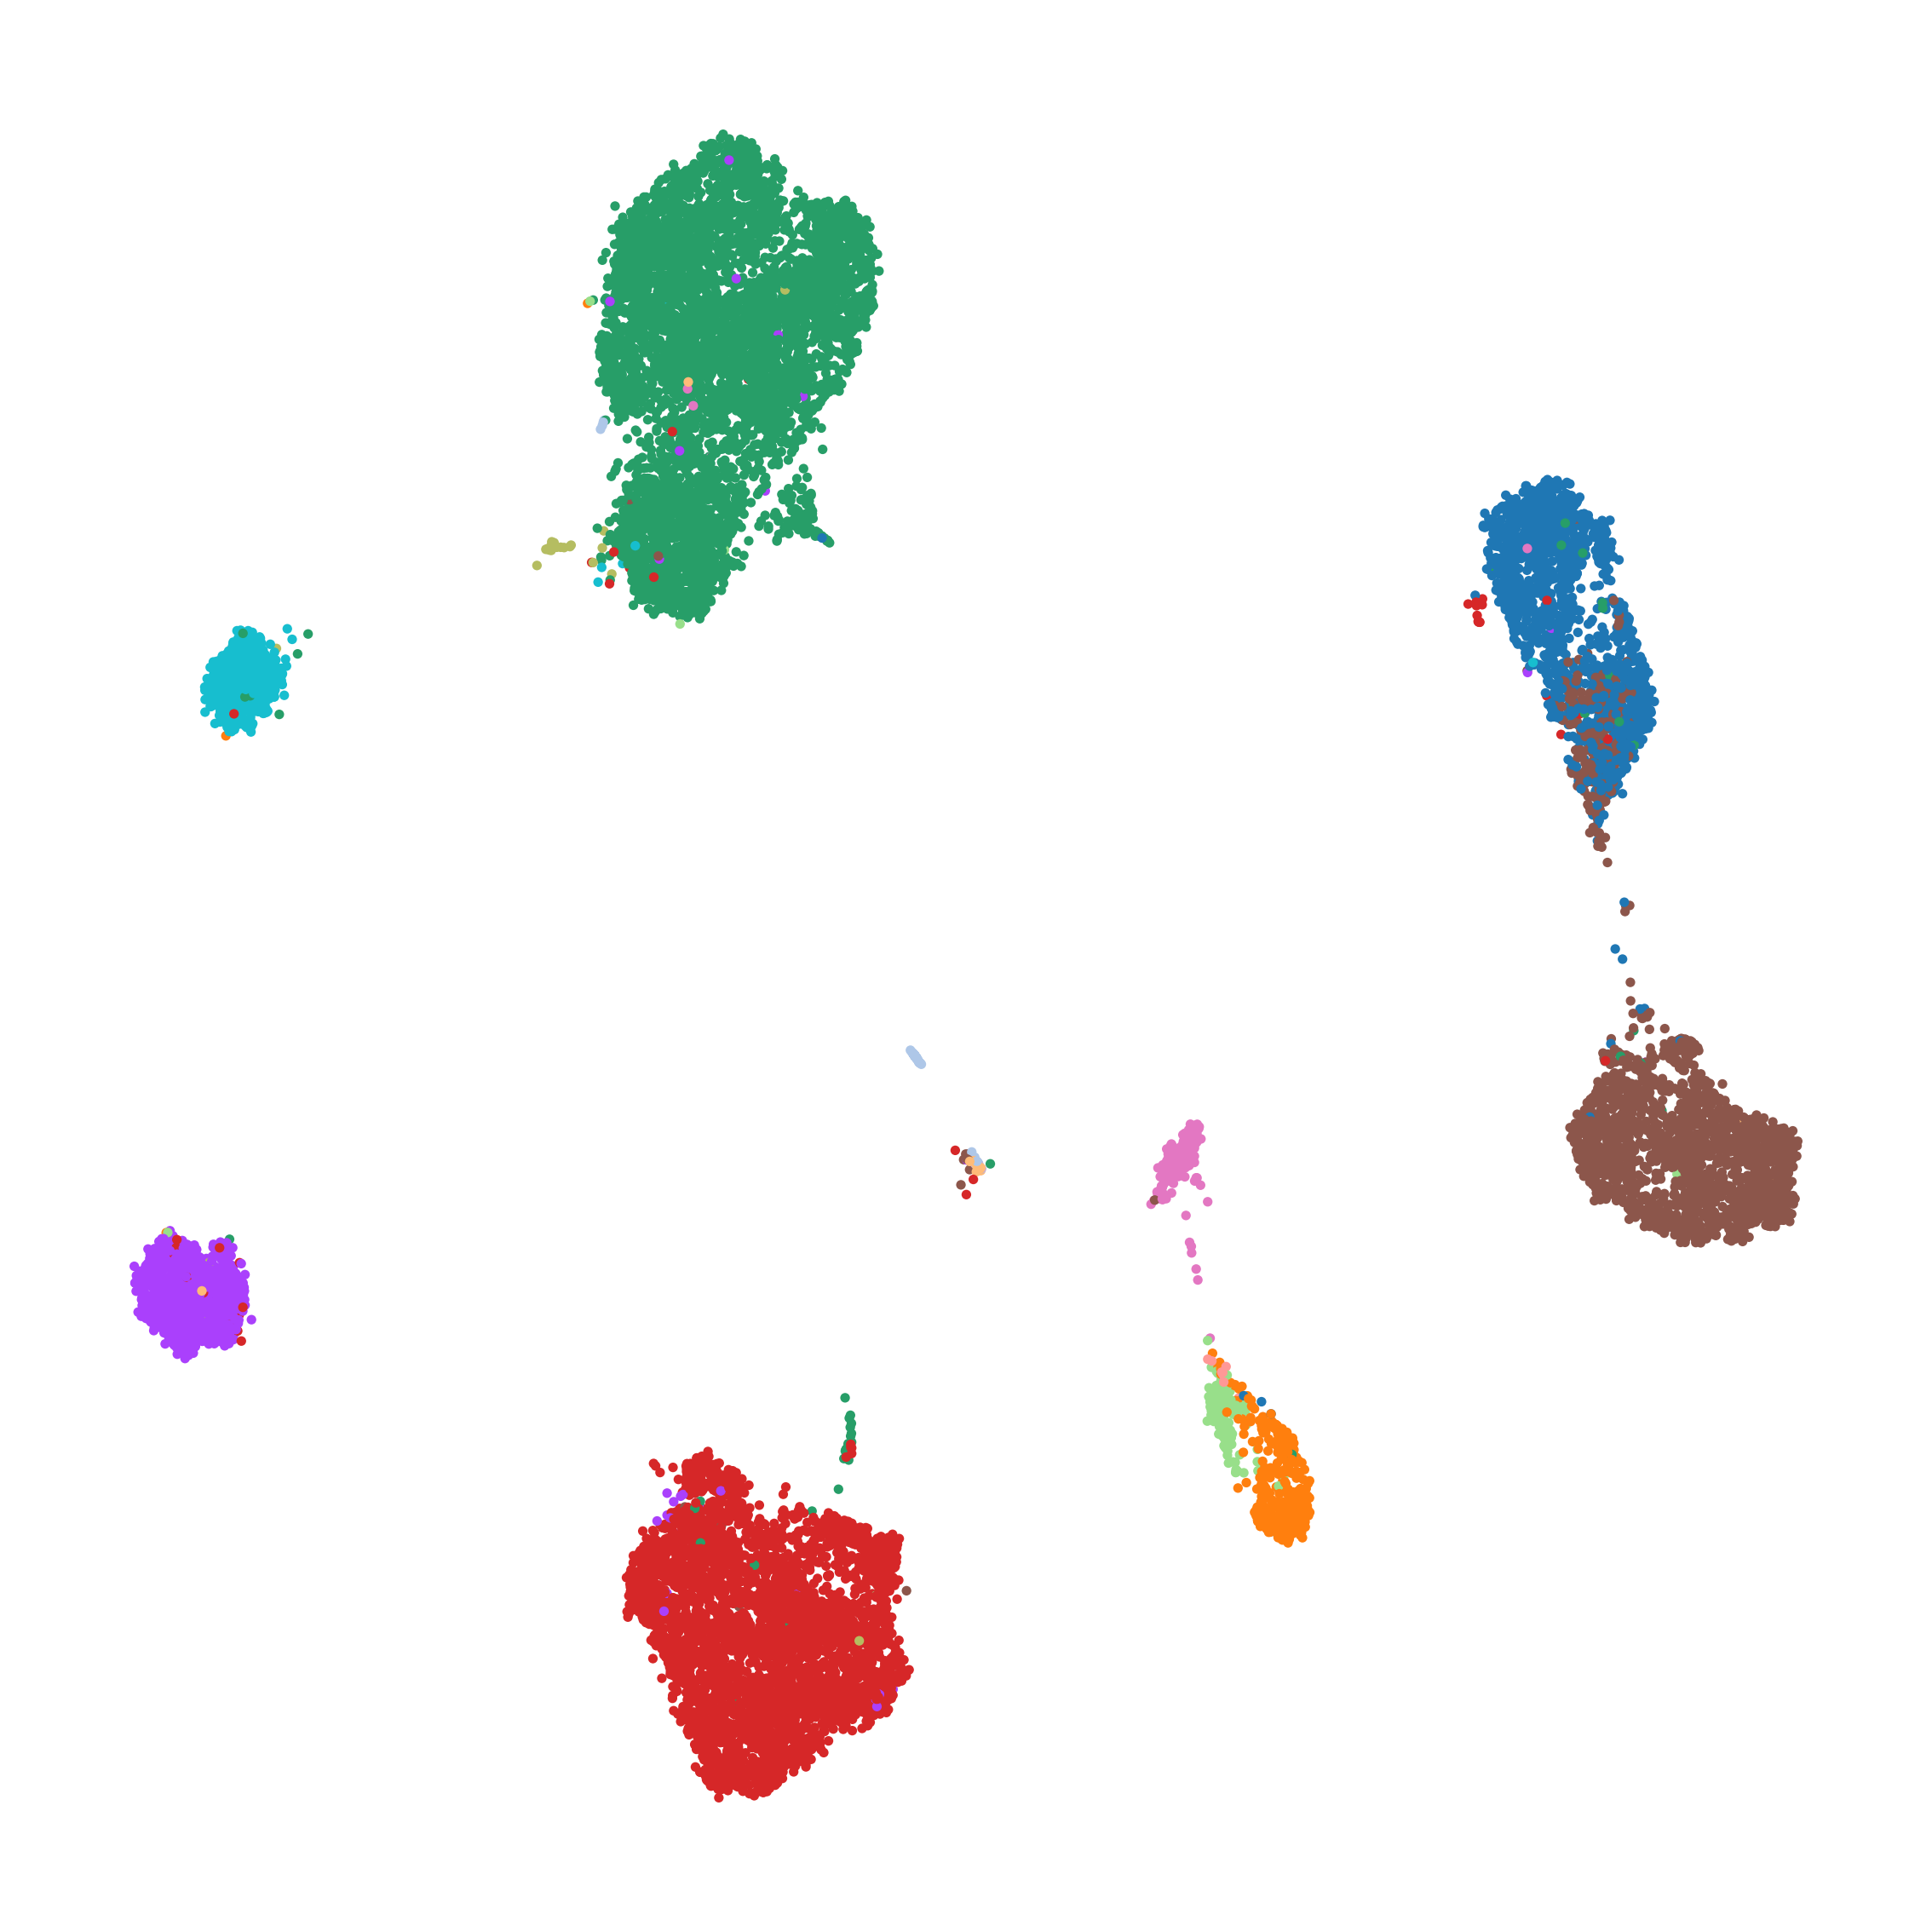

In [55]:
[clear_fig(sc.pl.umap(adata_bbknn, color=c, title='', legend_loc=None, return_fig=True)).savefig(f'./{path_results}/bbknn_{c}.jpg')  for c in ['batch', 'cell_ontology_class']]

In [56]:
bbknn_bems = metrics.batch_entropy_mixing_score(adata_bbknn.obsm['X_umap'], adata_bbknn.obs['batch'])
print(bbknn_bems)
bbknn_sc = metrics.silhouette_score(adata_bbknn.obsm['X_umap'], adata_bbknn.obs['cell_ontology_class'].cat.codes)
print(bbknn_sc)

0.4208671213255628
0.6071498


In [57]:
bbknn_metrics = metrics.evaluate_all(adata_raw, adata_bbknn, 'bbknn', batch_key='batch', label_key='cell_ontology_class', cluster_nmi=None, verbose=False)
print(bbknn_metrics)

C:\Users\10360\anaconda3\envs\py39\lib\site-packages\scib\metrics\metrics.py:293: DeprecationWarning: Call to deprecated function (or staticmethod) opt_louvain.
  res_max, nmi_max, nmi_all = opt_louvain(


NMI...
ARI...
Silhouette score...
PC regression...
Isolated labels F1...
Compute neighbors on rep X_pca
Isolated labels ASW...
Graph connectivity...
                                  0
NMI_cluster/label          0.911949
ARI_cluster/label          0.951137
ASW_label                  0.576165
ASW_label/batch            0.855147
PCR_batch                  0.000000
cell_cycle_conservation         NaN
isolated_label_F1          0.104478
isolated_label_silhouette  0.637399
graph_conn                 0.950240
kBET                            NaN
iLISI                           NaN
cLISI                           NaN
hvg_overlap                     NaN
trajectory                      NaN


In [58]:
bbknn_metrics.to_csv(f'{path_results}/bbknn_metrics.csv', index=True, header=True)

# harmony

In [59]:
from scCorrect.baseline import harmony_integrate
adata_harmony = harmony_integrate(adata_raw)
sc.pp.neighbors(adata_harmony, use_rep='X_emb', n_neighbors=30)
sc.tl.umap(adata_harmony, min_dist=0.1)


2023-08-17 15:08:52,609 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-08-17 15:08:52,609 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-08-17 15:08:56,519 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-08-17 15:08:56,519 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-08-17 15:08:56,612 - harmonypy - INFO - Iteration 1 of 10
2023-08-17 15:08:56,612 - harmonypy - INFO - Iteration 1 of 10
2023-08-17 15:09:00,066 - harmonypy - INFO - Iteration 2 of 10
2023-08-17 15:09:00,066 - harmonypy - INFO - Iteration 2 of 10
2023-08-17 15:09:03,559 - harmonypy - INFO - Iteration 3 of 10
2023-08-17 15:09:03,559 - harmonypy - INFO - Iteration 3 of 10
2023-08-17 15:09:07,029 - harmonypy - INFO - Converged after 3 iterations
2023-08-17 15:09:07,029 - harmonypy - INFO - Converged after 3 iterations


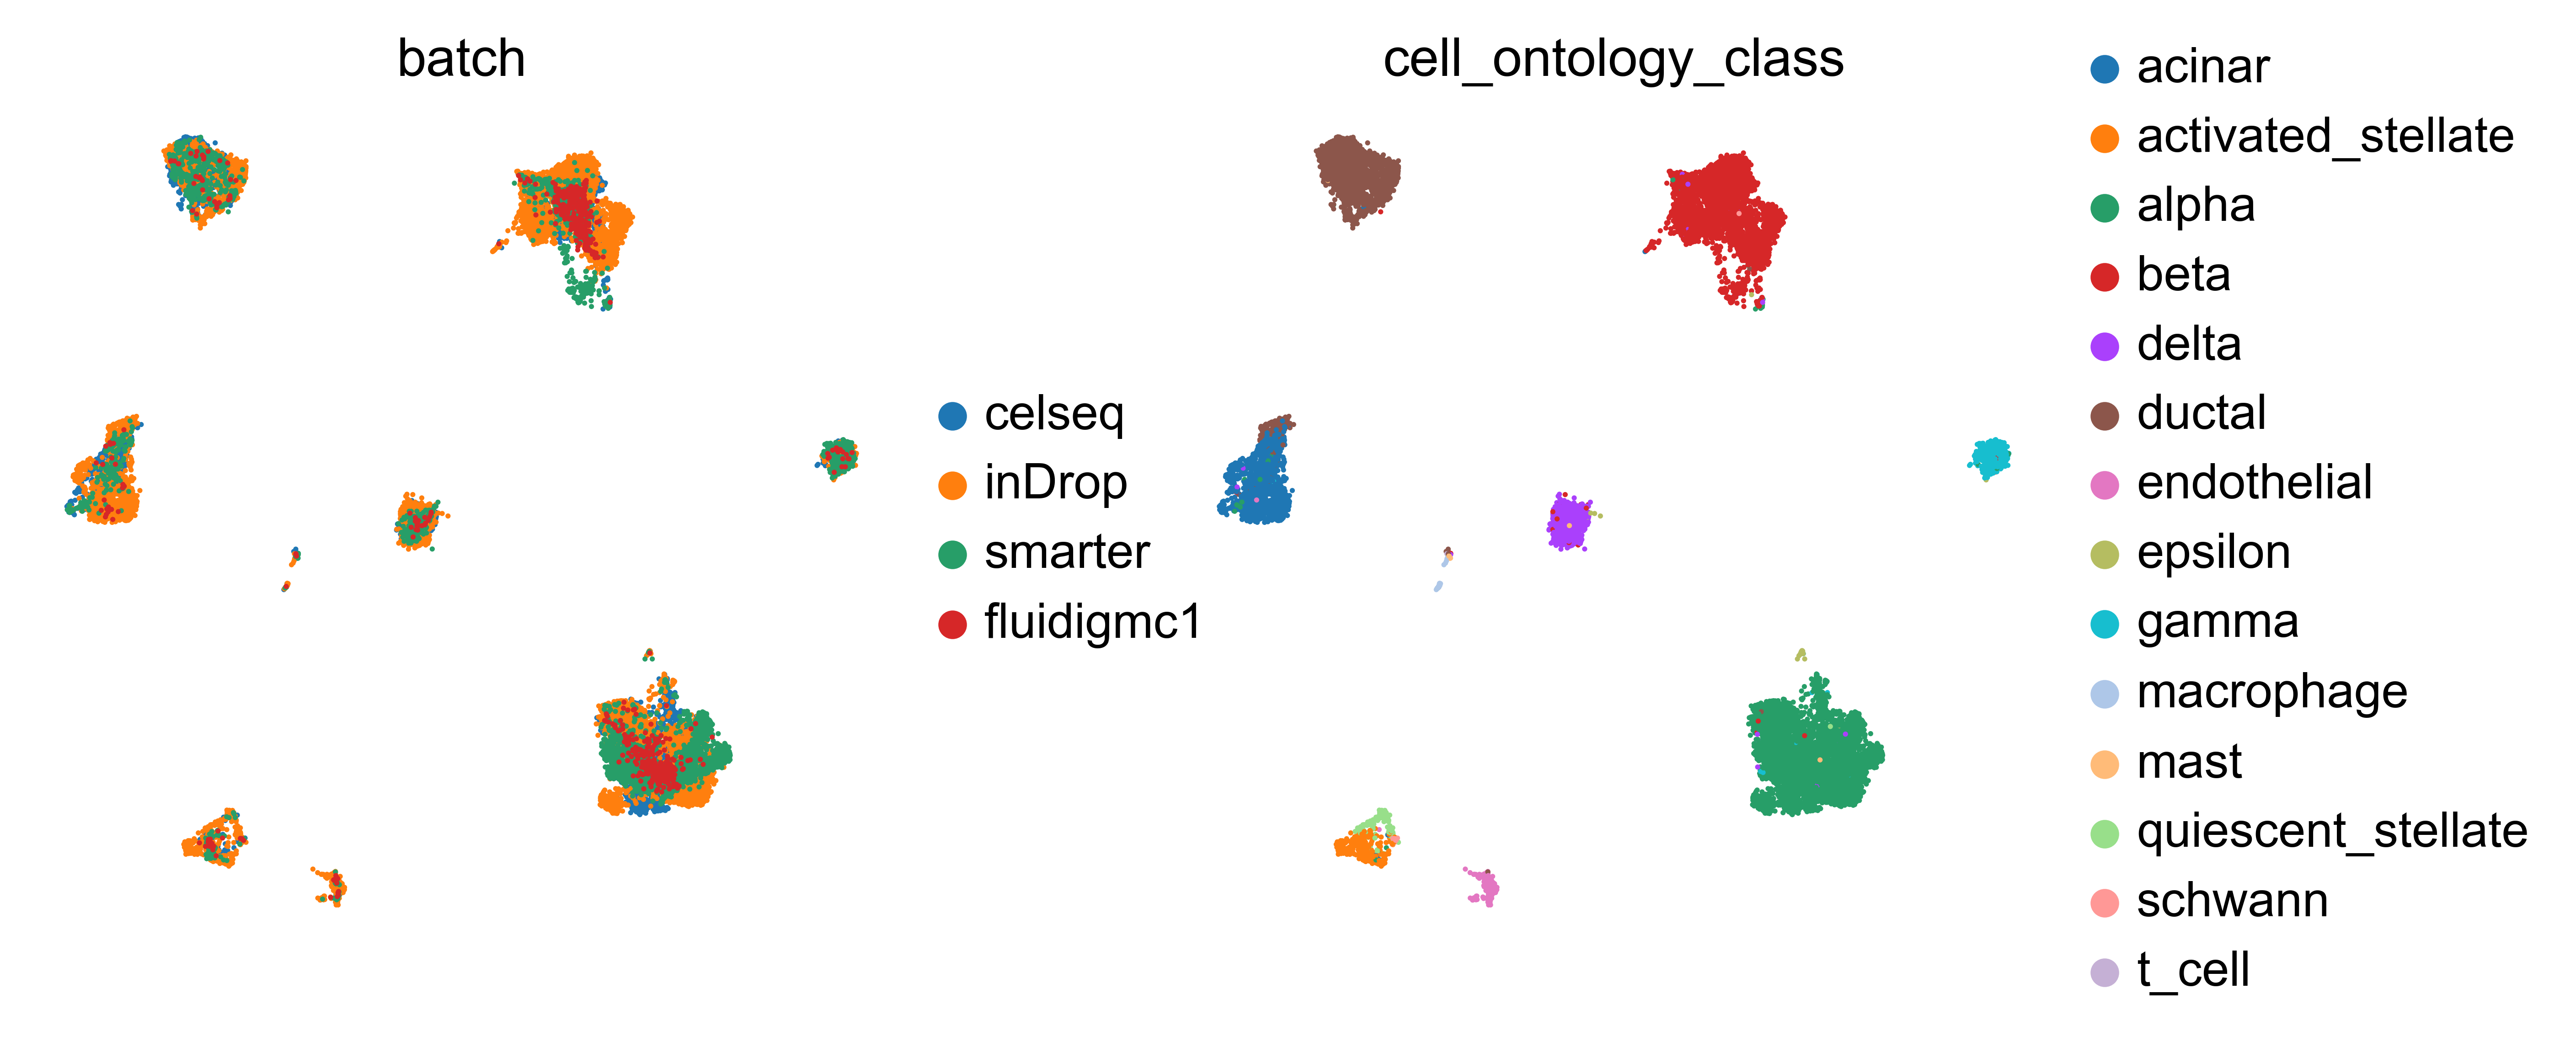

[None, None]

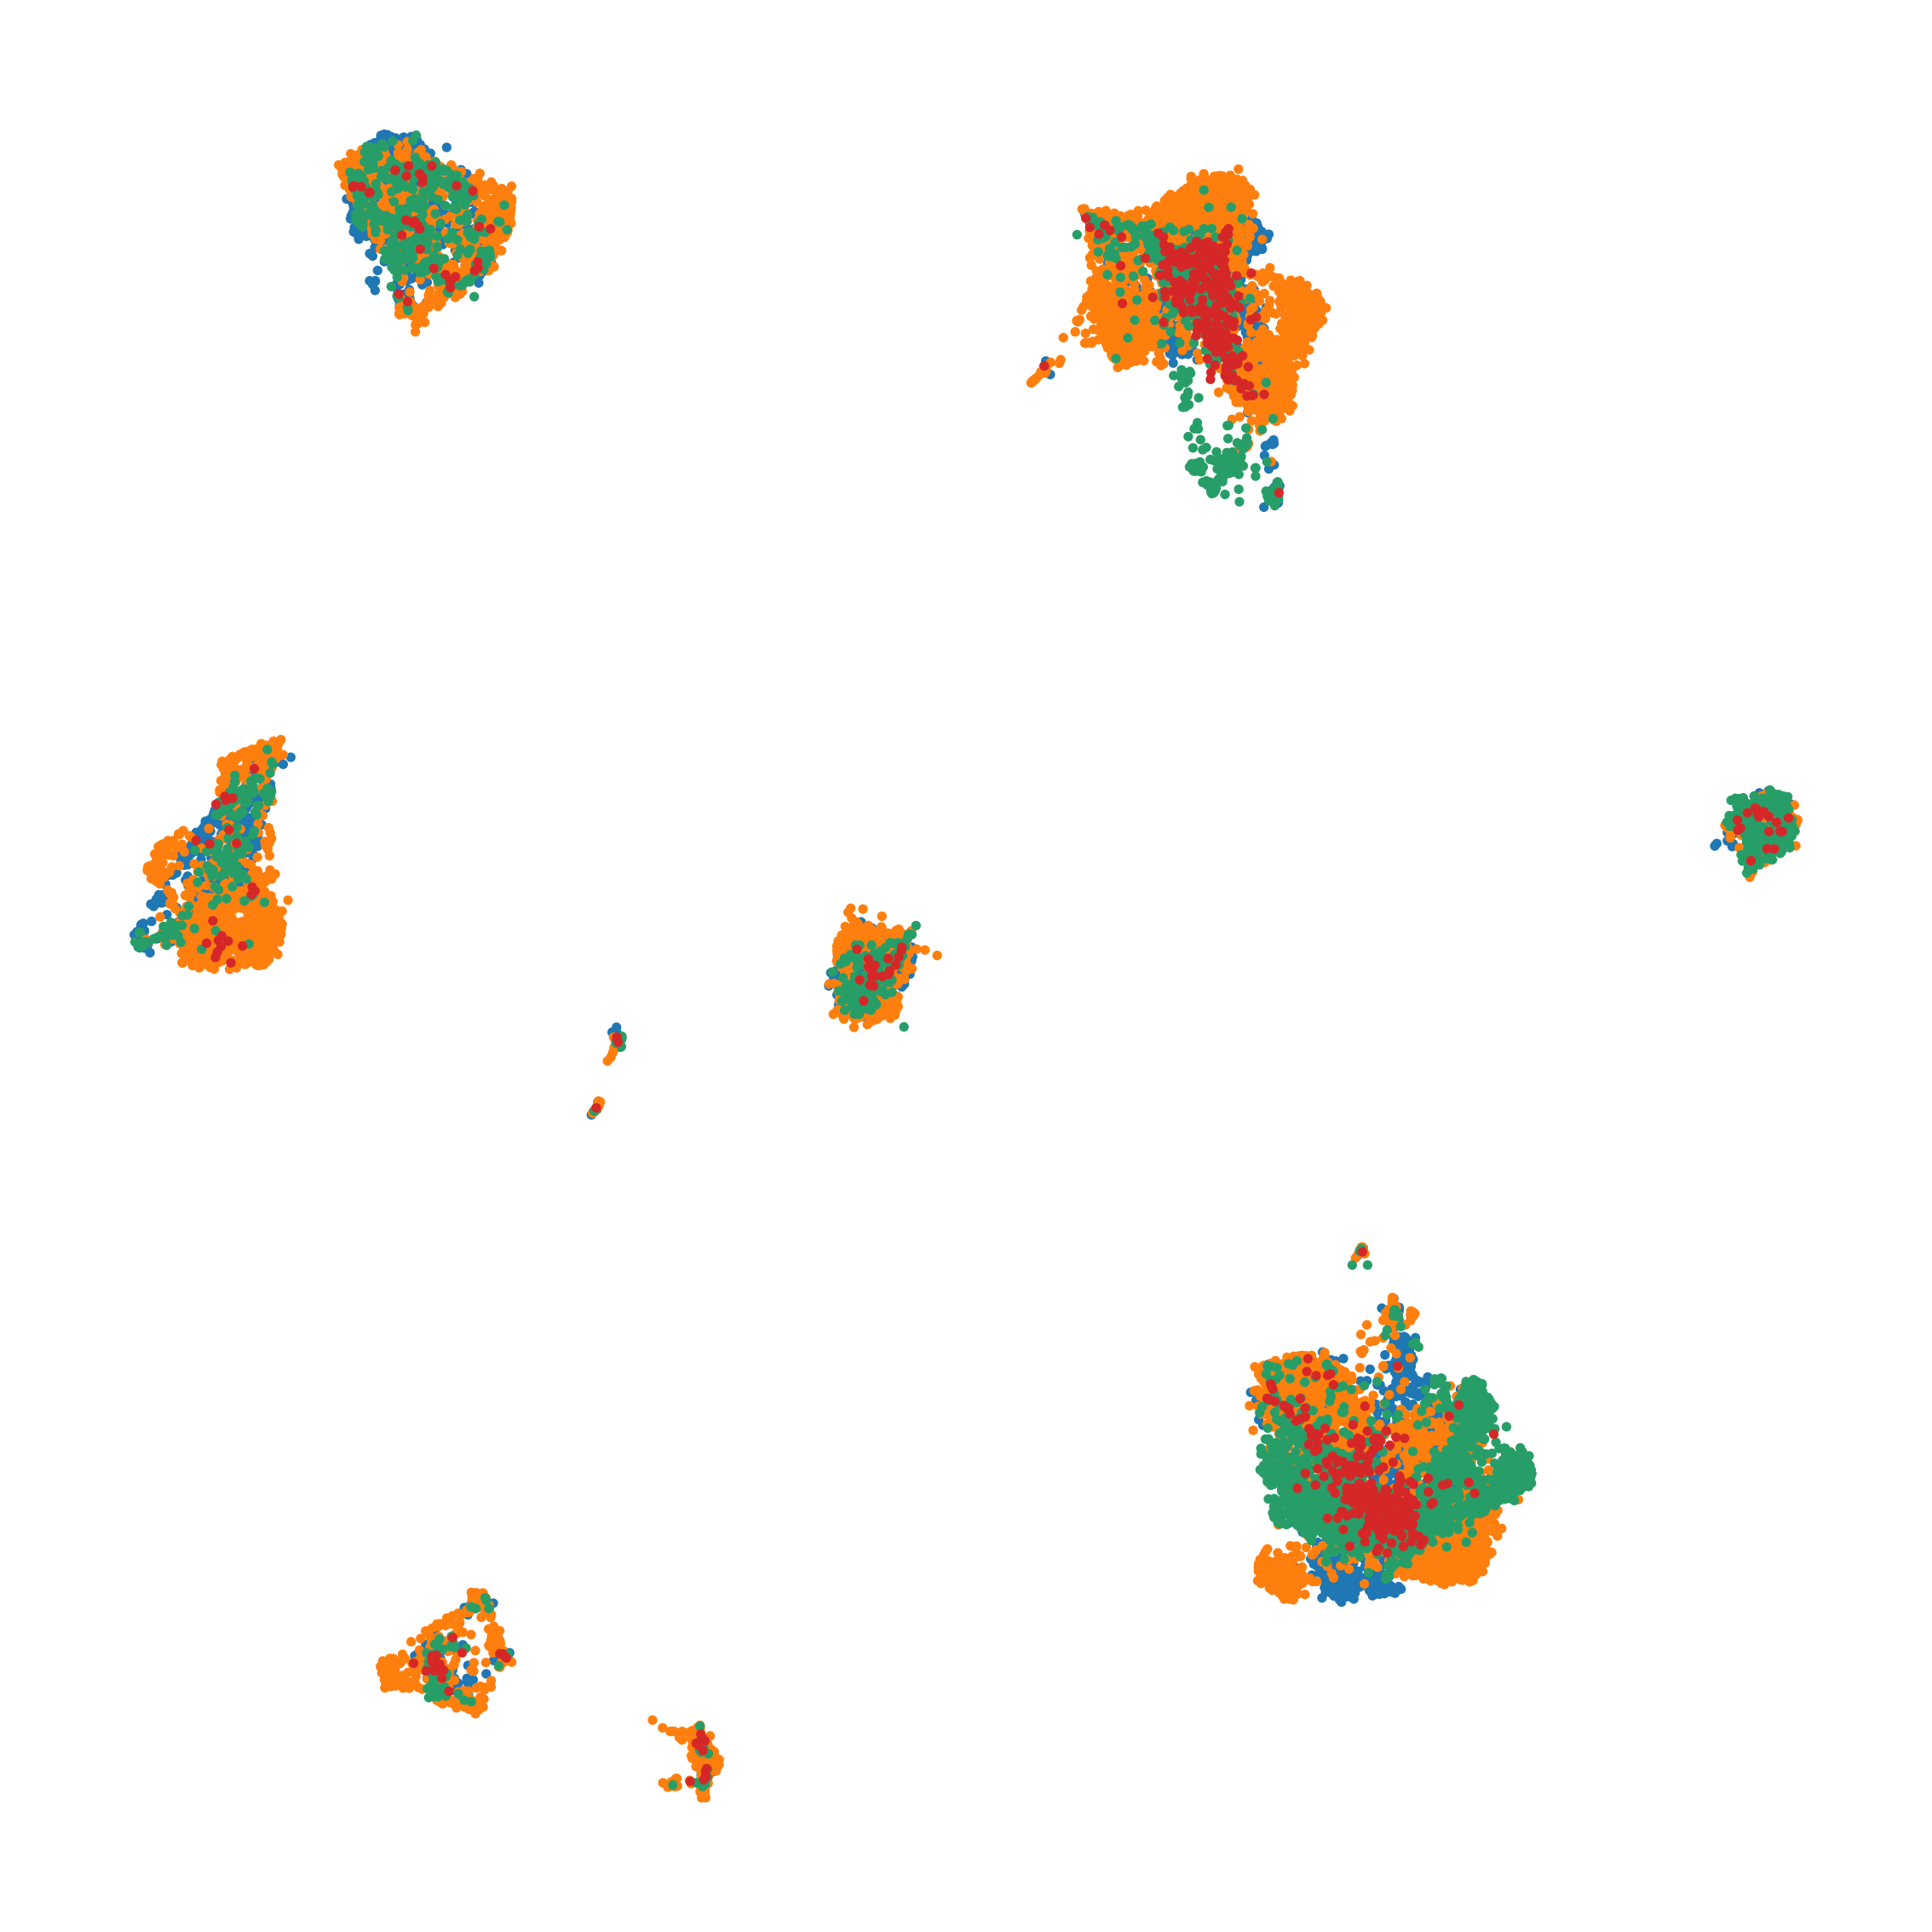

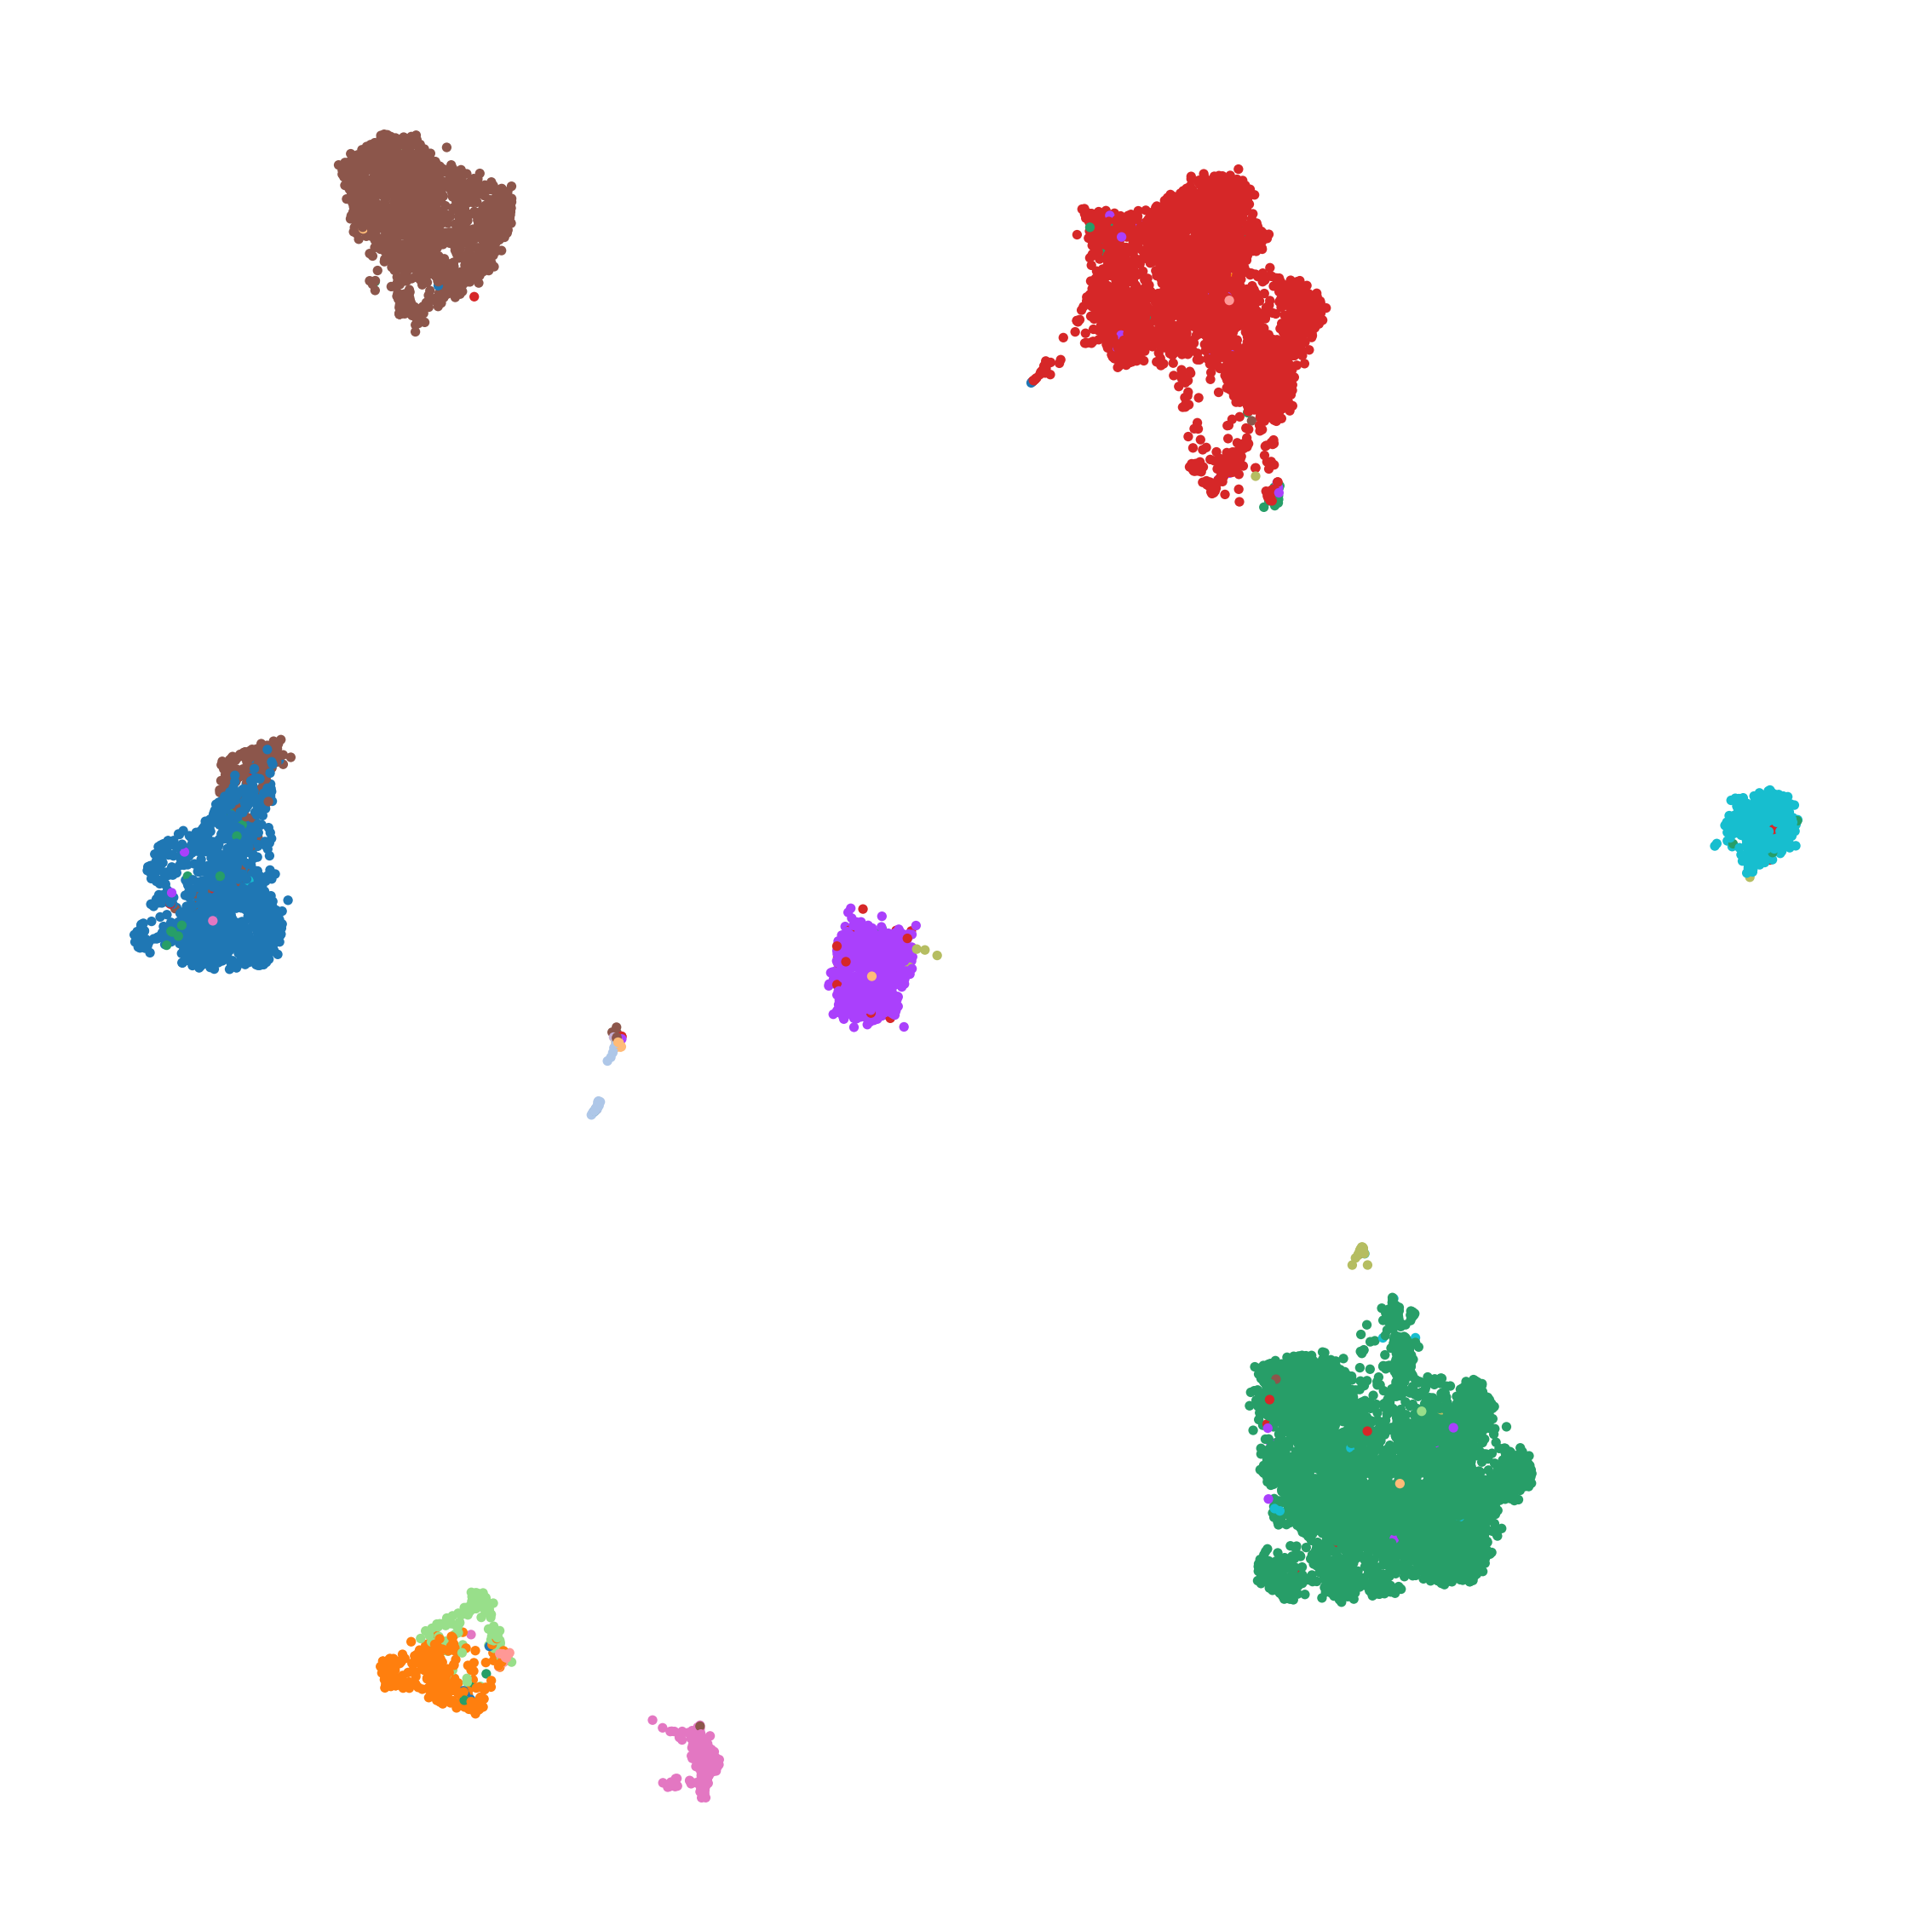

In [61]:
fig = sc.pl.umap(adata_harmony, color=['batch', 'cell_ontology_class'])
[clear_fig(sc.pl.umap(adata_harmony, color=c, title='', legend_loc=None, return_fig=True)).savefig(f'./{path_results}/harmony_{c}.jpg')  for c in ['batch', 'cell_ontology_class']]

In [62]:
harmony_bems = metrics.batch_entropy_mixing_score(adata_harmony.obsm['X_umap'], adata_harmony.obs['batch'])
print(harmony_bems)
harmony_sc = metrics.silhouette_score(adata_harmony.obsm['X_umap'], adata_harmony.obs['cell_ontology_class'].cat.codes)
print(harmony_sc)

0.41623230265996697
0.69147855


In [63]:
harmony_metrics = metrics.evaluate_all(adata_raw, adata_harmony, 'scalex', batch_key='batch', label_key='cell_ontology_class', cluster_nmi=None, verbose=False)
print(harmony_metrics)


C:\Users\10360\anaconda3\envs\py39\lib\site-packages\scib\metrics\metrics.py:293: DeprecationWarning: Call to deprecated function (or staticmethod) opt_louvain.
  res_max, nmi_max, nmi_all = opt_louvain(


NMI...
ARI...
Silhouette score...
PC regression...
Isolated labels F1...
Compute neighbors on rep X_emb
Isolated labels ASW...
Graph connectivity...
                                  0
NMI_cluster/label          0.908196
ARI_cluster/label          0.946980
ASW_label                  0.607198
ASW_label/batch            0.876852
PCR_batch                  0.839705
cell_cycle_conservation         NaN
isolated_label_F1          0.095890
isolated_label_silhouette  0.628902
graph_conn                 0.981052
kBET                            NaN
iLISI                           NaN
cLISI                           NaN
hvg_overlap                     NaN
trajectory                      NaN


In [64]:
harmony_metrics.to_csv(f'{path_results}/harmony_metrics.csv', index=True, header=True)

# scvi

In [74]:
from scCorrect.baseline import scvi_integrate
adata_scvi = scvi_integrate(adata_raw)
sc.pp.neighbors(adata_scvi, use_rep='X_emb', n_neighbors=30)
sc.tl.umap(adata_scvi, min_dist=0.1)

C:\Users\10360\anaconda3\envs\py39\lib\site-packages\lightning\fabric\__init__.py:36: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('lightning.fabric')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  __import__("pkg_resources").declare_namespace(__name__)
C:\Users\10360\anaconda3\envs\py39\lib\site-packages\pkg_resources\__init__.py:2350: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('lightning')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)
C:\Users\10360\anaconda3\envs\py39\lib\site-packages\torchmetrics\utilities\imports.py:24: DeprecationWarning: distutils Version classes are

Epoch 100/100: 100%|████████████████████████████████████████████████████████████████████████████| 100/100 [02:12<00:00,  1.45s/it, v_num=1, train_loss_step=712, train_loss_epoch=705]

INFO: `Trainer.fit` stopped: `max_epochs=100` reached.
2023-08-17 15:21:05,158 - lightning.pytorch.utilities.rank_zero - INFO - `Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|████████████████████████████████████████████████████████████████████████████| 100/100 [02:12<00:00,  1.32s/it, v_num=1, train_loss_step=712, train_loss_epoch=705]


[None, None]

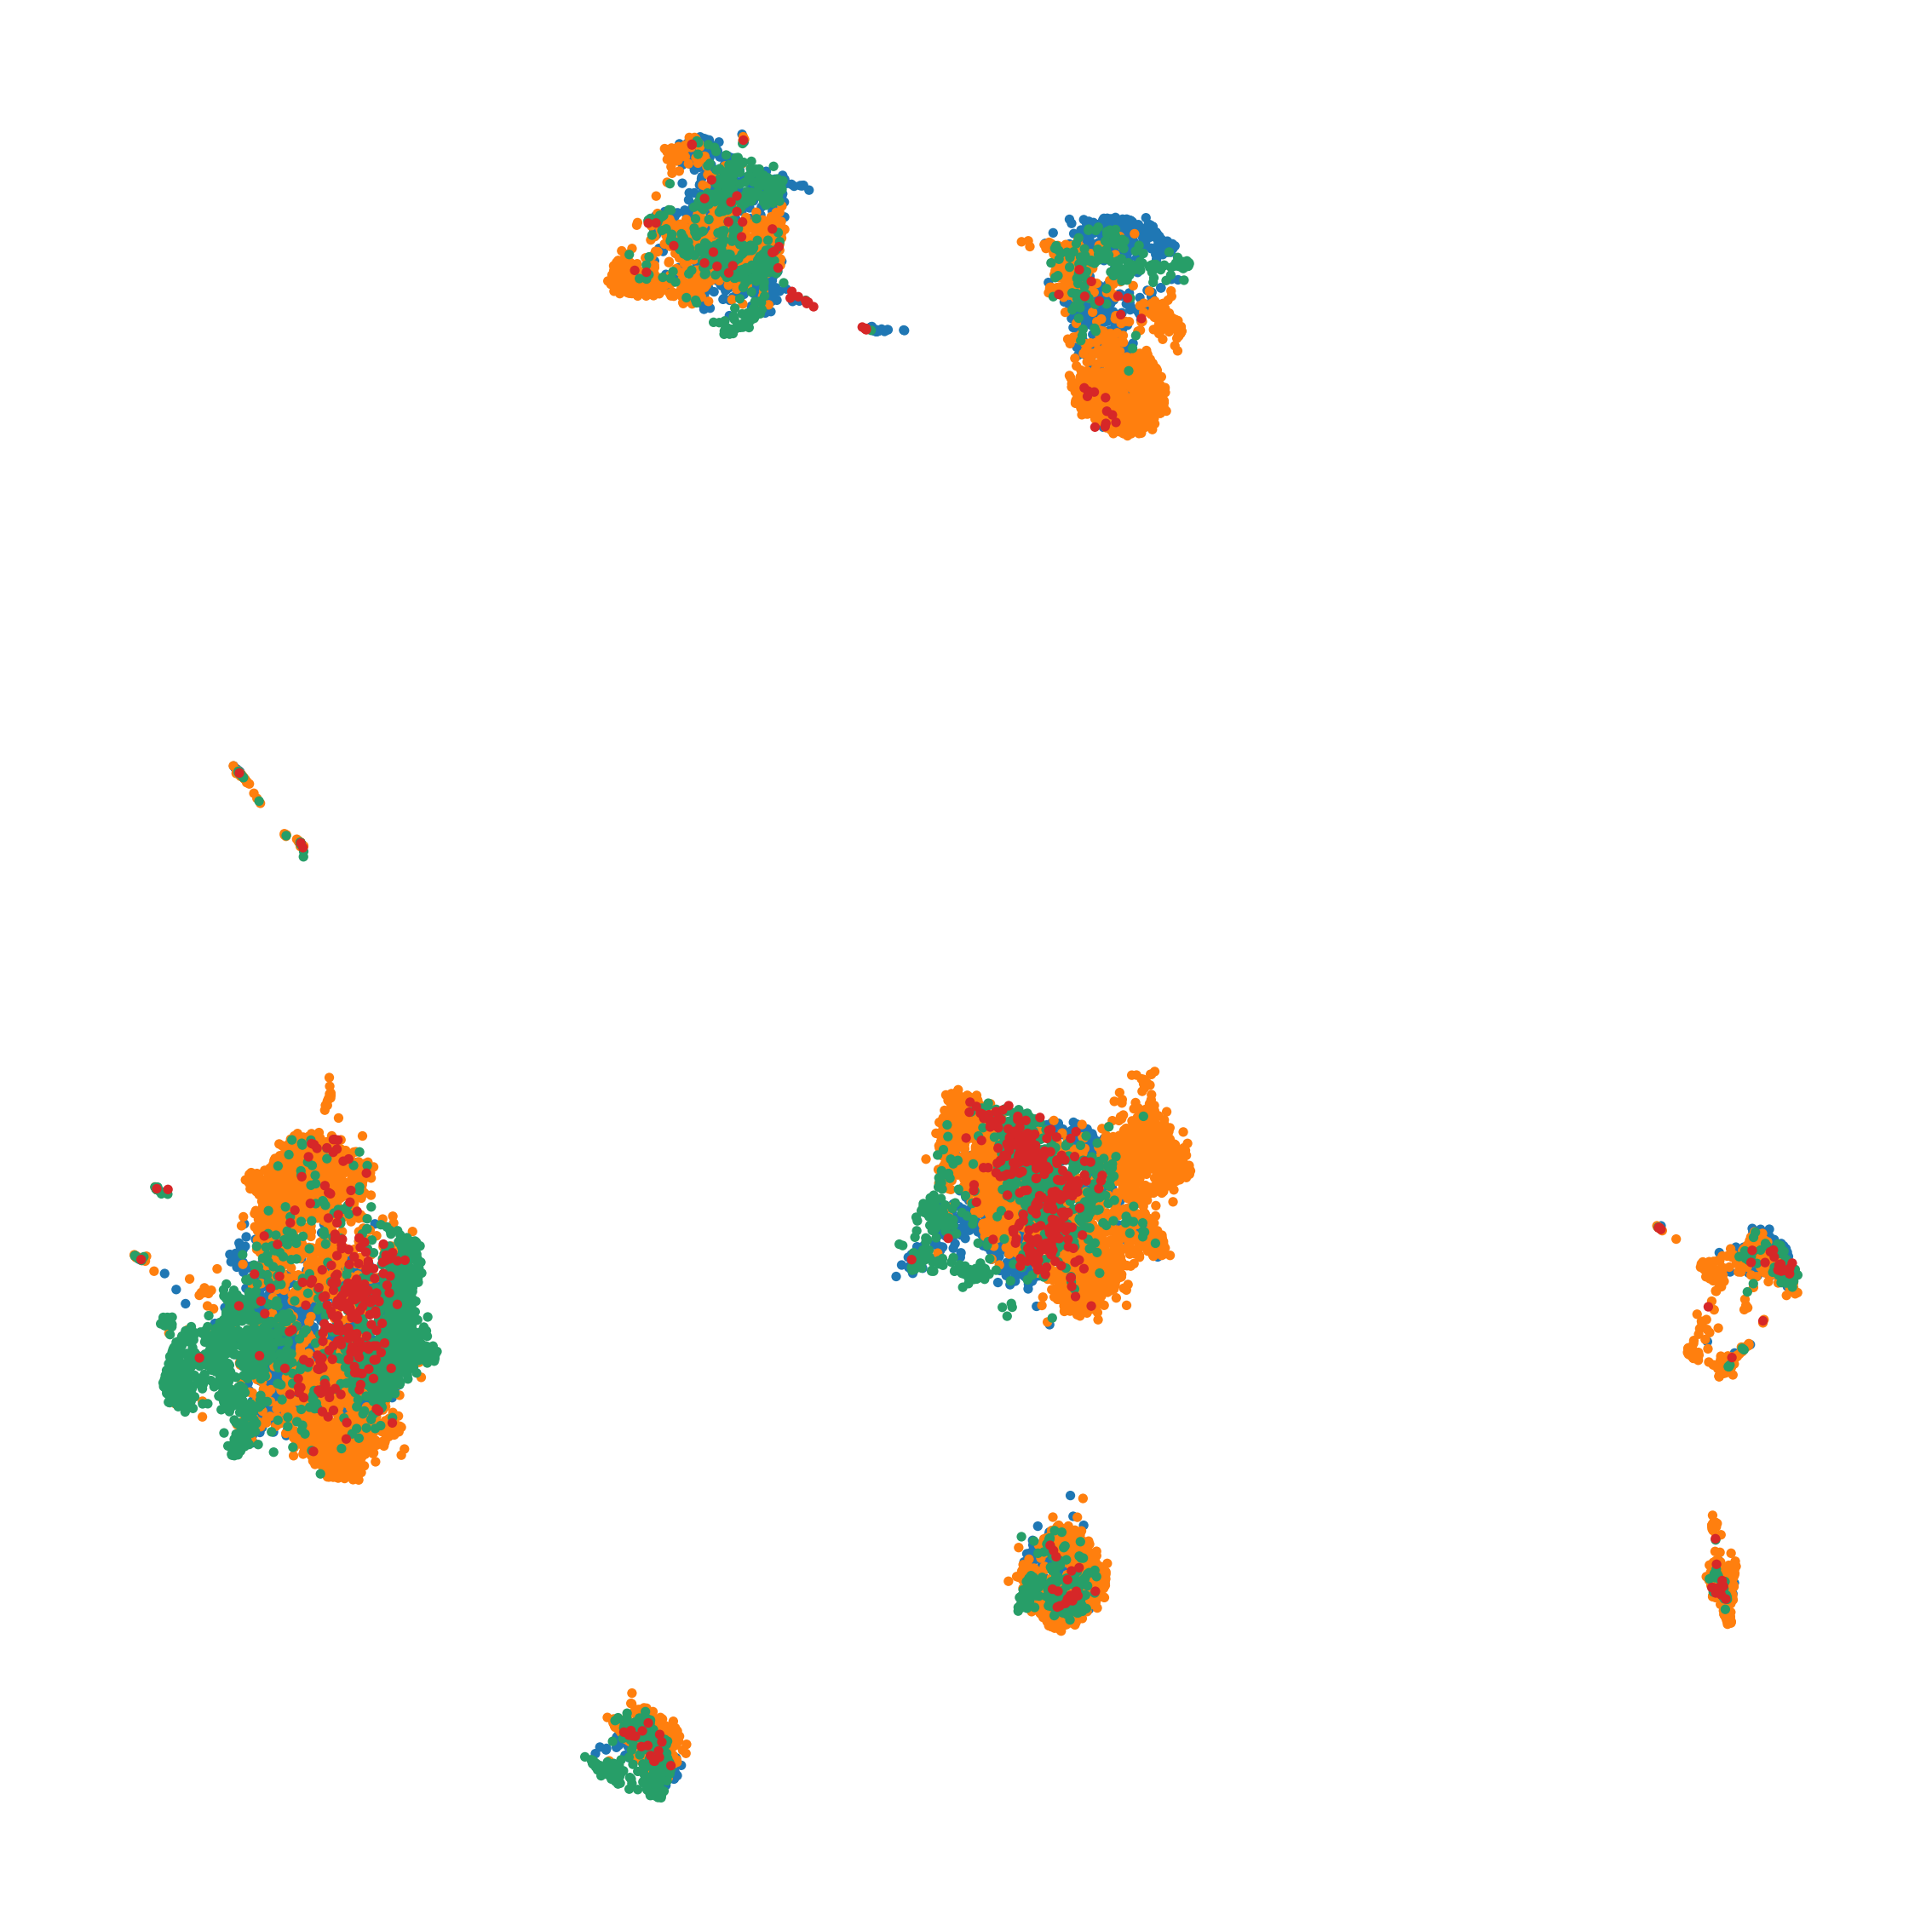

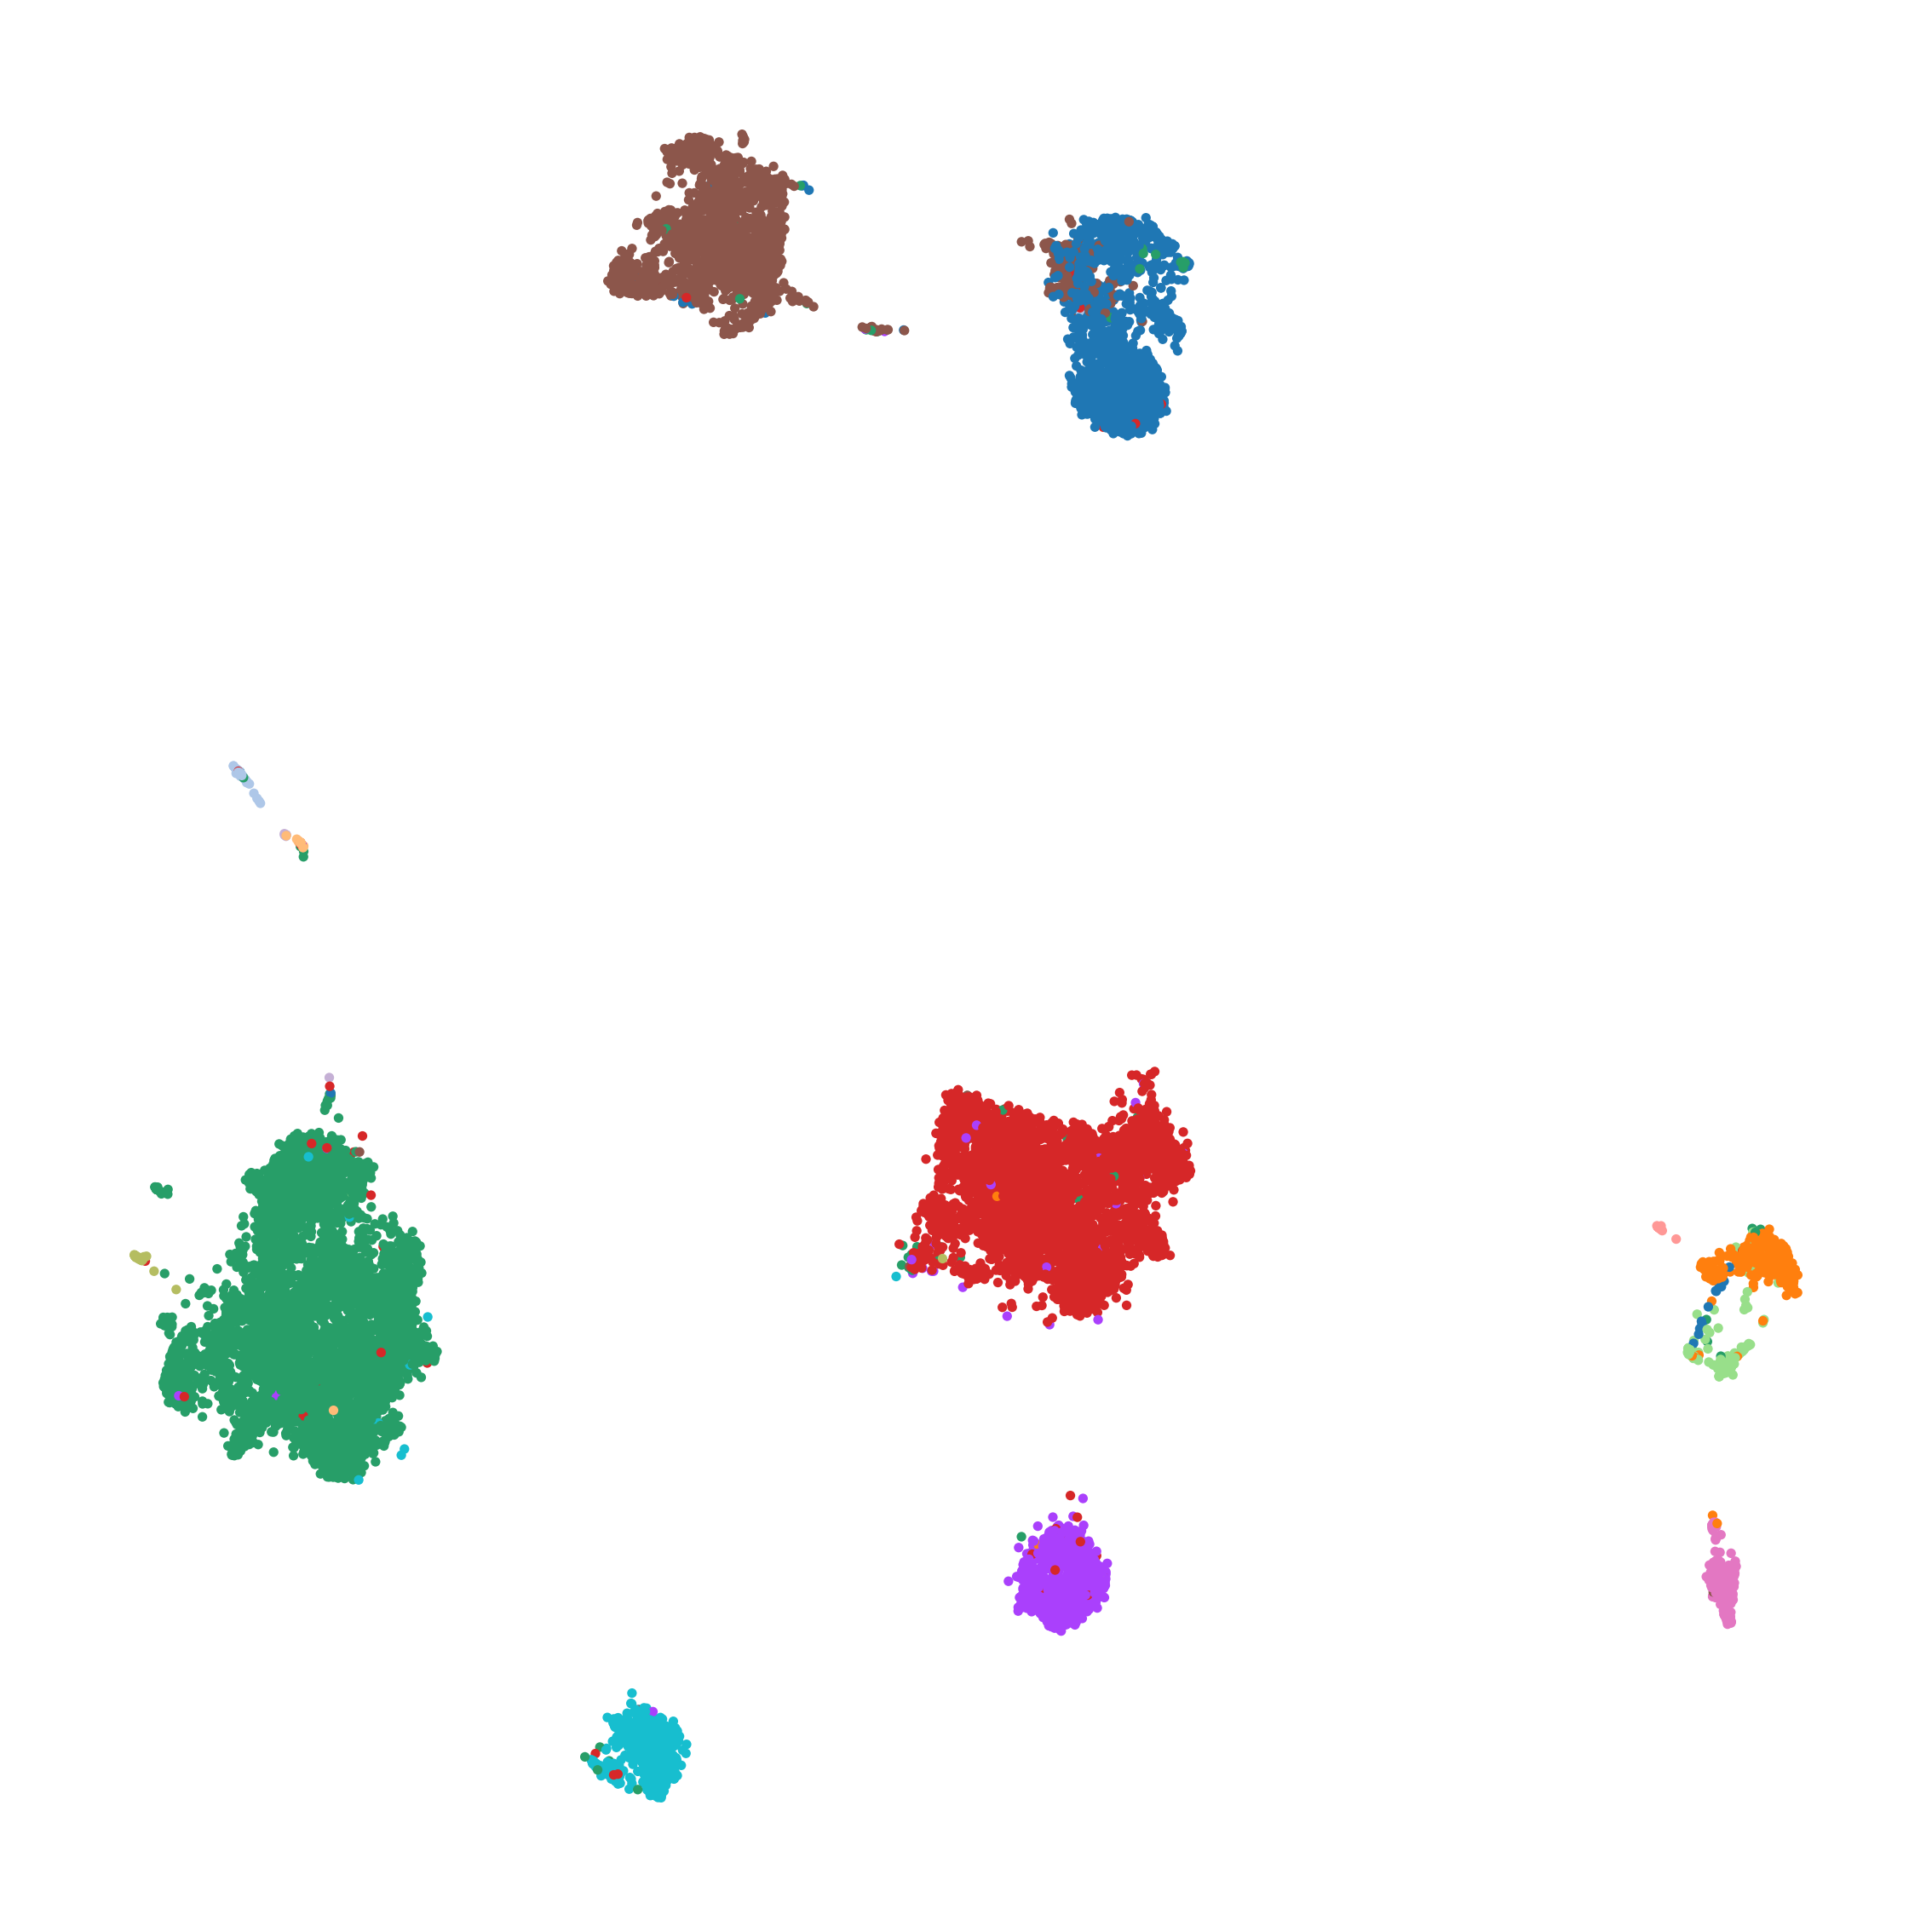

In [76]:
# fig = sc.pl.umap(adata_scvi, color=['batch', 'cell_ontology_class'])
[clear_fig(sc.pl.umap(adata_scvi, color=c, title='', legend_loc=None, return_fig=True)).savefig(f'./{path_results}/scvi_{c}.jpg')  for c in ['batch', 'cell_ontology_class']]

In [77]:
scvi_bems = metrics.batch_entropy_mixing_score(adata_scvi.obsm['X_umap'], adata_scvi.obs['batch'])
print(scvi_bems)
scvi_sc = metrics.silhouette_score(adata_scvi.obsm['X_umap'], adata_scvi.obs['cell_ontology_class'].cat.codes)
print(scvi_sc)

0.3948558994067832
0.58804524


In [78]:
scvi_metrics = metrics.evaluate_all(adata_raw, adata_scvi, 'scvi', batch_key='batch', label_key='cell_ontology_class', cluster_nmi=None, verbose=False)
print(scvi_metrics)


C:\Users\10360\anaconda3\envs\py39\lib\site-packages\scib\metrics\metrics.py:293: DeprecationWarning: Call to deprecated function (or staticmethod) opt_louvain.
  res_max, nmi_max, nmi_all = opt_louvain(


NMI...
ARI...
Silhouette score...
PC regression...
Isolated labels F1...
Compute neighbors on rep X_emb
Isolated labels ASW...
Graph connectivity...
                                  0
NMI_cluster/label          0.918876
ARI_cluster/label          0.952518
ASW_label                  0.567553
ASW_label/batch            0.907815
PCR_batch                  0.804202
cell_cycle_conservation         NaN
isolated_label_F1          0.126126
isolated_label_silhouette  0.640722
graph_conn                 0.991006
kBET                            NaN
iLISI                           NaN
cLISI                           NaN
hvg_overlap                     NaN
trajectory                      NaN


In [79]:
scvi_metrics.to_csv(f'{path_results}/scvi_metrics.csv', index=True, header=True)

# scaleX

2023-08-18 17:02:05,732 - SCALEX - INFO - Raw dataset shape: (16382, 19093)
2023-08-18 17:02:05,732 - SCALEX - INFO - Raw dataset shape: (16382, 19093)
2023-08-18 17:02:05,732 - SCALEX - INFO - Raw dataset shape: (16382, 19093)
2023-08-18 17:02:05,735 - SCALEX - INFO - There are 4 batches under batch_name: batch
2023-08-18 17:02:05,735 - SCALEX - INFO - There are 4 batches under batch_name: batch
2023-08-18 17:02:05,735 - SCALEX - INFO - There are 4 batches under batch_name: batch
2023-08-18 17:02:05,737 - SCALEX - INFO - Preprocessing
2023-08-18 17:02:05,737 - SCALEX - INFO - Preprocessing
2023-08-18 17:02:05,737 - SCALEX - INFO - Preprocessing
2023-08-18 17:02:05,754 - SCALEX - INFO - Filtering cells
2023-08-18 17:02:05,754 - SCALEX - INFO - Filtering cells
2023-08-18 17:02:05,754 - SCALEX - INFO - Filtering cells
2023-08-18 17:02:06,747 - SCALEX - INFO - Filtering features
2023-08-18 17:02:06,747 - SCALEX - INFO - Filtering features
2023-08-18 17:02:06,747 - SCALEX - INFO - Filterin

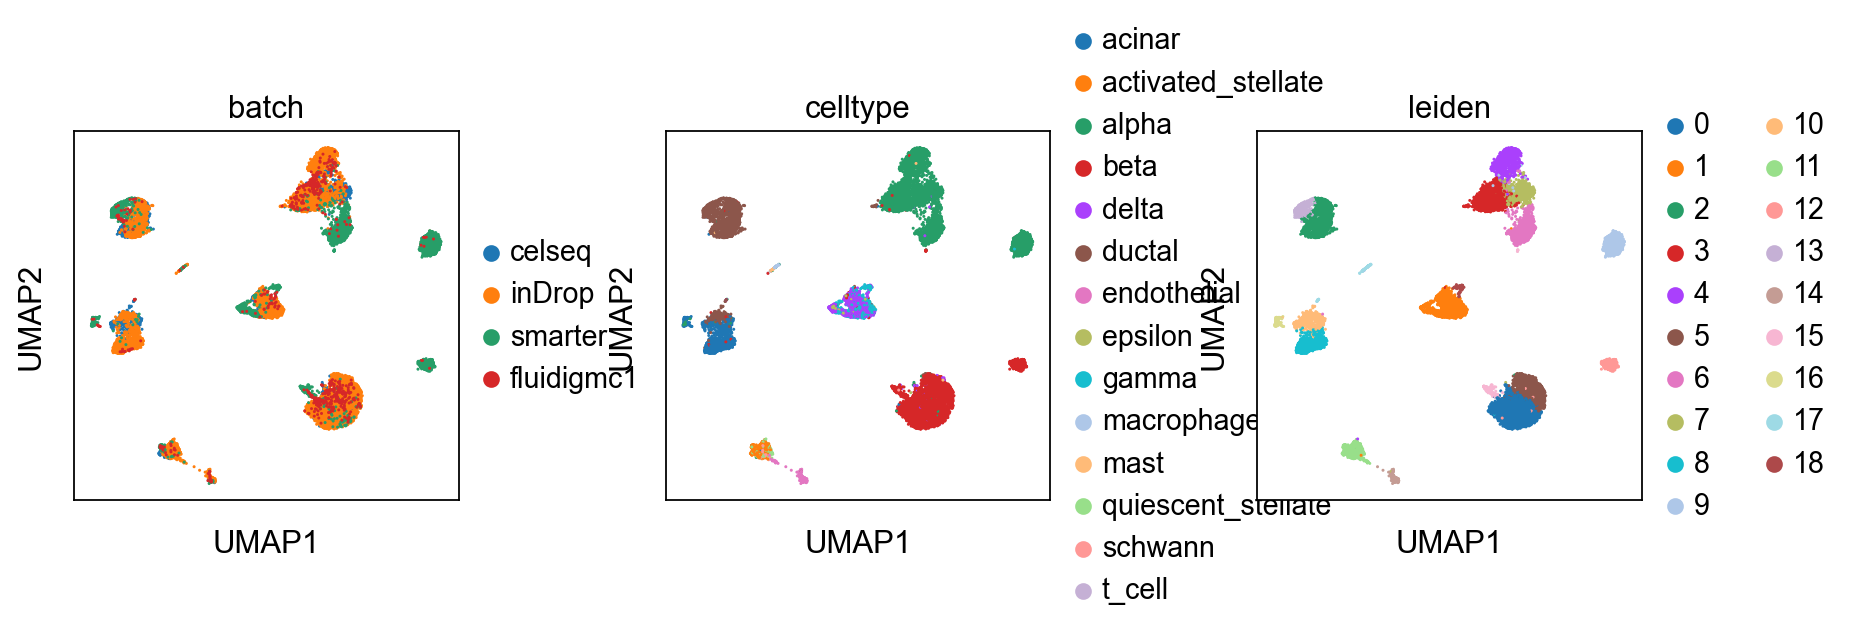

In [48]:
from scCorrect.baseline import scaleX_integrate
adata_scaleX = scaleX_integrate(data_list, batches=conditions, max_iteration=30000)

In [49]:
sc.set_figure_params(dpi=300, figsize=(4, 4), frameon=False)    # TODO 是否画边框

[None, None]

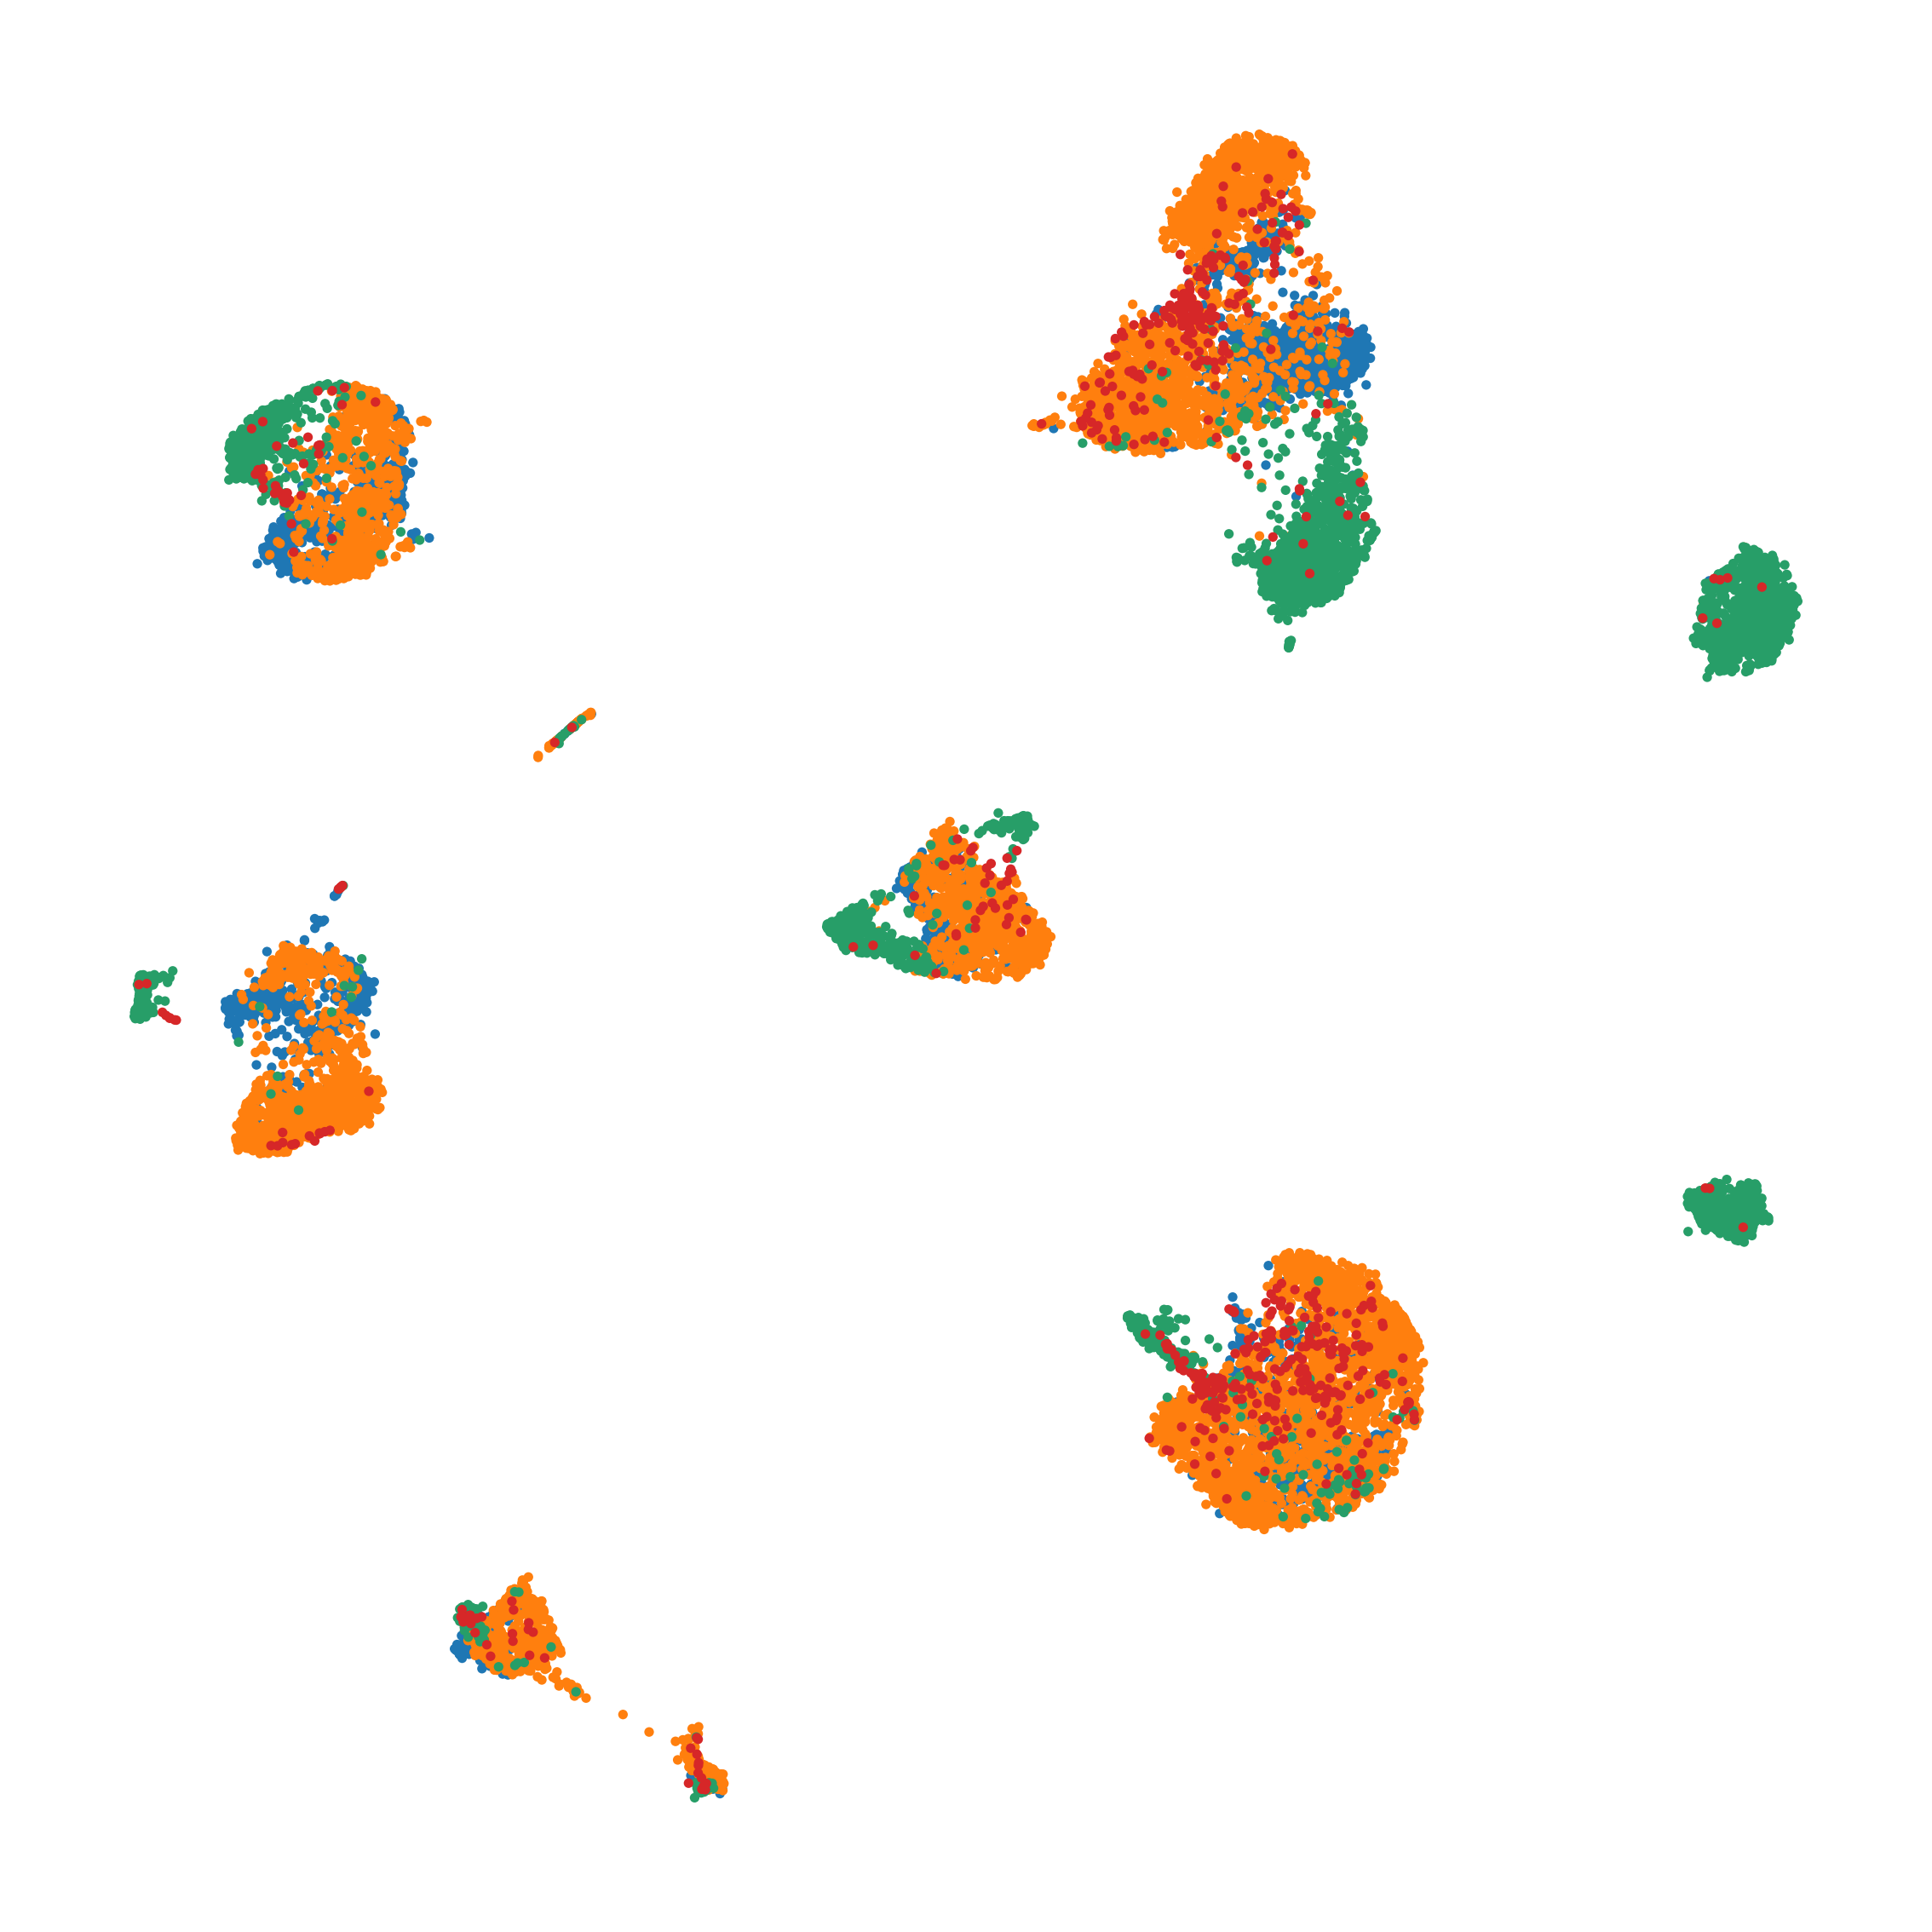

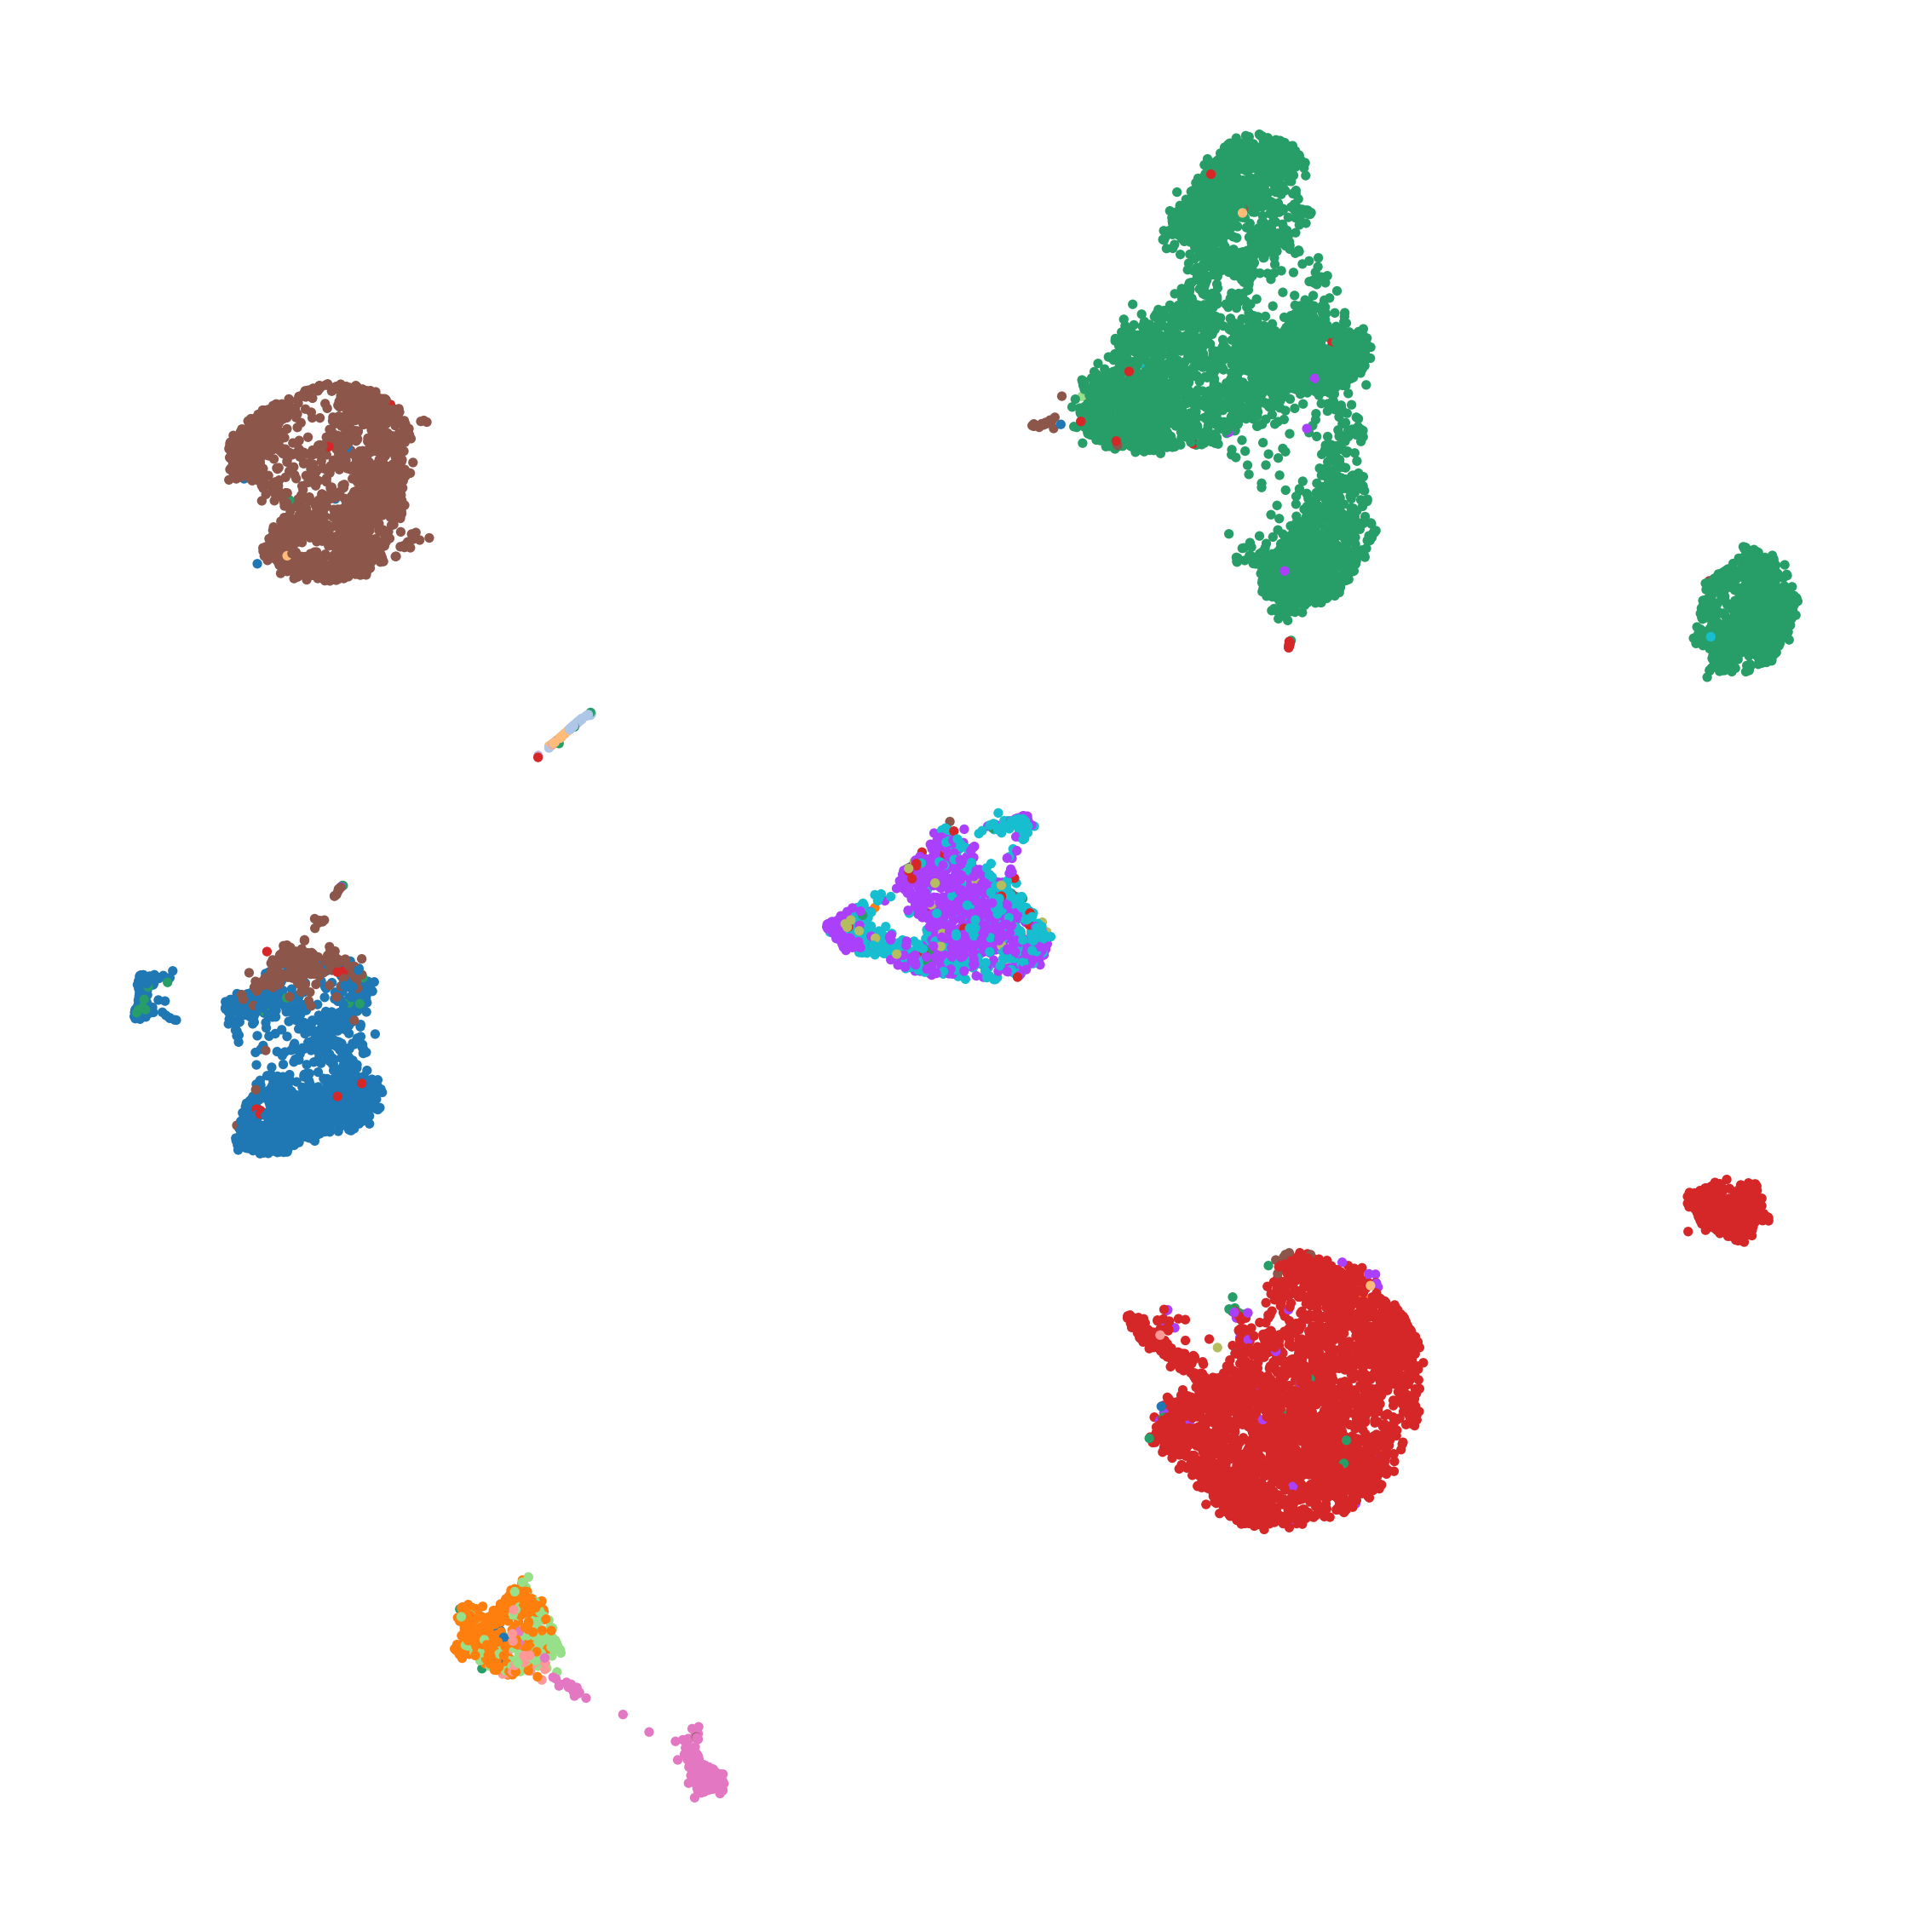

In [50]:
sc.pp.neighbors(adata_scaleX, use_rep='X_emb', n_neighbors=30)
sc.tl.umap(adata_scaleX, min_dist=0.1)
# fig = sc.pl.umap(adata_scaleX, color=['batch', 'cell_ontology_class'])
[clear_fig(sc.pl.umap(adata_scaleX, color=c, title='', legend_loc=None, return_fig=True)).savefig(f'./{path_results}/scaleX_{c}.jpg')  for c in ['batch', 'cell_ontology_class']]

In [51]:
scaleX_bems = metrics.batch_entropy_mixing_score(adata_scaleX.obsm['X_umap'], adata_scaleX.obs['batch'])
print(scaleX_bems)
scaleX_sc = metrics.silhouette_score(adata_scaleX.obsm['X_umap'], adata_scaleX.obs['cell_ontology_class'].cat.codes)
print(scaleX_sc)

0.2942459512690632
0.4883255


In [52]:
scaleX_metrics = metrics.evaluate_all(adata_raw, adata_scaleX, 'scalex', batch_key='batch', label_key='cell_ontology_class', cluster_nmi=None, verbose=False)
print(scaleX_metrics)


NMI...
ARI...
Silhouette score...
PC regression...
Isolated labels F1...
Compute neighbors on rep X_emb
Isolated labels ASW...
Graph connectivity...
                                  0
NMI_cluster/label          0.821193
ARI_cluster/label          0.784433
ASW_label                  0.616048
ASW_label/batch            0.877716
PCR_batch                  0.999146
cell_cycle_conservation         NaN
isolated_label_F1          0.104478
isolated_label_silhouette  0.568783
graph_conn                 0.982659
kBET                            NaN
iLISI                           NaN
cLISI                           NaN
hvg_overlap                     NaN
trajectory                      NaN


In [53]:
scaleX_metrics.to_csv(f'{path_results}/scaleX_metrics.csv', index=True, header=True)